In [5]:
import numpy as np
import xarray as xr
import scipy.signal as sg
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import patches
import npc_lims
from statsmodels.stats.multitest import fdrcorrection
from npc_sessions import DynamicRoutingSession
import npc_session
from dynamic_routing_analysis import spike_utils, plot_utils
import os

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#load data
regenerate_table=False
all_data_loadpath=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\all_data_plus_performance.pkl"

if regenerate_table:
    savepath=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined"
    stim_context_loadpath = os.path.join(savepath,"all_stim_context_modulation.pkl")
    lick_loadpath = os.path.join(savepath,"all_lick_modulation.pkl")
    performance_loadpath = os.path.join(savepath,"performance_dict.pkl")
    spike_utils.concat_single_unit_metrics_across_sessions(stim_context_loadpath=stim_context_loadpath,lick_loadpath=lick_loadpath,
                                                           performance_loadpath=performance_loadpath,savepath=savepath)

all_data = pd.read_pickle(all_data_loadpath)


In [10]:
sel_project='DynamicRouting'
sel_units=all_data.query('presence_ratio>=0.99 and \
                            isi_violations_ratio<=0.1 and \
                            amplitude_cutoff<=0.1 and \
                            project.str.contains(@sel_project) and \
                            ~structure.isna() and ~location.isna() and \
                            cross_modal_dprime>=1.0')

adj_pvals=spike_utils.calculate_single_unit_metric_adjusted_pvals(sel_units,sel_project)

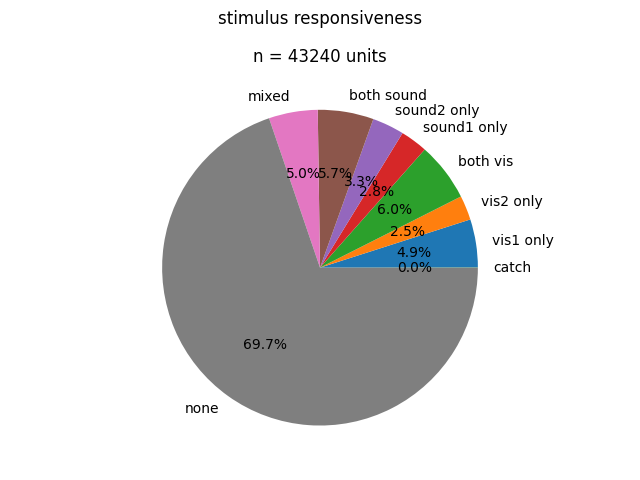

In [11]:
#plot overall stimulus modulation
spike_utils.plot_stimulus_modulation(adj_pvals,sel_project)

In [ ]:
#calculate stimulus modulation by region



In [ ]:
# # fdrcorrection(sel_units['lick_modulation_p_value'])
# np.mean(adj_pvals['context_linear_shift']<0.05)

In [ ]:
save_path=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\example_PSTHs\stim"

# multimodal_units=np.random.choice(mixed_stim_resp['unit_id'].values,100)
# for uid in multimodal_units:
#     if sel_units.query('unit_id==@uid')['structure'].values[0]=='RT':
#         try:
#             plot_utils.plot_unit_by_id(uid,save_path,'stimulus: multimodal')
#         except:
#             print(f'unit {uid} failed')

# vis1_only_units=np.random.choice(vis1_stim_resp['unit_id'].values,20)
# for uid in vis1_only_units:
#     try:
#         plot_utils.plot_stim_response_by_unit_id(uid,save_path,'visual responsive')
#     except:
#         print(f'unit {uid} failed')

sound1_only_units=np.random.choice(sound1_stim_resp['unit_id'].values,30)
for uid in sound1_only_units:
    try:
        plot_utils.plot_stim_response_by_unit_id(uid,save_path,'auditory responsive')
    except:
        print(f'unit {uid} failed')

In [ ]:
trials=pd.read_parquet(
                npc_lims.get_cache_path('trials',uid[:17],version='any')
            )
trials.columns

In [ ]:
#stimulus responses
labels=['vis1 only','vis2 only','both vis',
        'sound1 only','sound2 only','both sound',
        'mixed','none','catch']
sizes=[len(vis1_stim_resp),len(vis2_stim_resp),len(both_vis_stim_resp),
        len(sound1_stim_resp),len(sound2_stim_resp),len(both_sound_stim_resp),
        len(mixed_stim_resp),len(no_stim_resp),len(catch_stim_resp)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
ax.set_title('n = '+str(len(sel_units))+' units')
fig.suptitle('stimulus responsiveness')
fig.tight_layout()

# if 'Templeton' in sel_project:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","stimulus_responsiveness_Templeton.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)
# else:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","stimulus_responsiveness_DR.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)


In [ ]:
#stimulus context modulation
vis1_context_stim_mod=adj_pvals.query('vis1_context<0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
vis2_context_stim_mod=adj_pvals.query('vis2_context<0.05 and vis1_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
sound1_context_stim_mod=adj_pvals.query('sound1_context<0.05 and sound2_context>=0.05 and vis1_context>=0.05 and vis2_context>=0.05 and any_stim<0.05')
sound2_context_stim_mod=adj_pvals.query('sound2_context<0.05 and sound1_context>=0.05 and vis1_context>=0.05 and vis2_context>=0.05 and any_stim<0.05')

both_vis_context_stim_mod=adj_pvals.query('vis1_context<0.05 and vis2_context<0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
both_aud_context_stim_mod=adj_pvals.query('sound1_context<0.05 and sound2_context<0.05 and vis1_context>=0.05 and vis2_context>=0.05 and any_stim<0.05')
multi_modal_context_stim_mod=adj_pvals.query('((vis1_context<0.05 or vis2_context<0.05) and (sound1_context<0.05 or sound2_context<0.05)) and any_stim<0.05')

no_context_stim_mod=adj_pvals.query('vis1_context>=0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')

#evoked stimulus context modulation
vis1_context_evoked_stim_mod=adj_pvals.query('vis1_context_evoked<0.05 and vis2_context_evoked>=0.05 and sound1_context_evoked>=0.05 and sound2_context_evoked>=0.05 and any_stim<0.05')
vis2_context_evoked_stim_mod=adj_pvals.query('vis2_context_evoked<0.05 and vis1_context_evoked>=0.05 and sound1_context_evoked>=0.05 and sound2_context_evoked>=0.05 and any_stim<0.05')
sound1_context_evoked_stim_mod=adj_pvals.query('sound1_context_evoked<0.05 and sound2_context_evoked>=0.05 and vis1_context_evoked>=0.05 and vis2_context_evoked>=0.05 and any_stim<0.05')
sound2_context_evoked_stim_mod=adj_pvals.query('sound2_context_evoked<0.05 and sound1_context_evoked>=0.05 and vis1_context_evoked>=0.05 and vis2_context_evoked>=0.05 and any_stim<0.05')

both_vis_context_evoked_stim_mod=adj_pvals.query('vis1_context_evoked<0.05 and vis2_context_evoked<0.05 and sound1_context_evoked>=0.05 and sound2_context_evoked>=0.05 and any_stim<0.05')
both_aud_context_evoked_stim_mod=adj_pvals.query('sound1_context_evoked<0.05 and sound2_context_evoked<0.05 and vis1_context_evoked>=0.05 and vis2_context_evoked>=0.05 and any_stim<0.05')
multi_modal_context_evoked_stim_mod=adj_pvals.query('((vis1_context_evoked<0.05 or vis2_context_evoked<0.05) and (sound1_context_evoked<0.05 or sound2_context_evoked<0.05)) and any_stim<0.05')

no_context_evoked_stim_mod=adj_pvals.query('vis1_context_evoked>=0.05 and vis2_context_evoked>=0.05 and sound1_context_evoked>=0.05 and sound2_context_evoked>=0.05 and any_stim<0.05')

In [ ]:
labels=['vis1 only','vis2 only','both vis',
        'sound1 only','sound2 only','both sound',
        'mixed','none']
sizes=[len(vis1_context_stim_mod),len(vis2_context_stim_mod),len(both_vis_context_stim_mod),
        len(sound1_context_stim_mod),len(sound2_context_stim_mod),len(both_aud_context_stim_mod),
        len(multi_modal_context_stim_mod),len(no_context_stim_mod)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
ax.set_title('n = '+str(len(any_stim_resp))+' units')
# ax.set_title('n = '+str(len(stim_and_context))+' units')

fig.suptitle('context modulation of stimulus response')
fig.tight_layout()

# if 'Templeton' in sel_project:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_modulation_raw_stim_resp_Templeton.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)
# else:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_modulation_raw_stim_resp_DR.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)

In [ ]:
labels=['vis1 only','vis2 only','both vis',
        'sound1 only','sound2 only','both sound',
        'mixed','none']
sizes=[len(vis1_context_evoked_stim_mod),len(vis2_context_evoked_stim_mod),len(both_vis_context_evoked_stim_mod),
        len(sound1_context_evoked_stim_mod),len(sound2_context_evoked_stim_mod),len(both_aud_context_evoked_stim_mod),
        len(multi_modal_context_evoked_stim_mod),len(no_context_evoked_stim_mod)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
ax.set_title('n = '+str(len(any_stim_resp))+' units')

fig.suptitle('context modulation of evoked stimulus response')
fig.tight_layout()

# if 'Templeton' in sel_project:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_modulation_evoked_stim_resp_Templeton.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)
# else:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_modulation_evoked_stim_resp_DR.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)

In [ ]:
#lick modulation only
lick_resp=adj_pvals.query('lick<0.05 and context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')

#lick and context
lick_and_context_resp=adj_pvals.query('context<0.05 and lick<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')

#lick and stimulus
lick_and_stim_resp=adj_pvals.query('lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05')

#all three
all_resp=adj_pvals.query('context<0.05 and lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05)')

#stimulus modulation only
only_stim_resp=adj_pvals.query('(vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05 and lick>=0.05')

#context modulation only
context_resp=adj_pvals.query('context<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')

#stim and context modulation
stim_and_context_resp=adj_pvals.query('context<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and lick>=0.05')

neither_stim_nor_context_resp=adj_pvals.query('context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')  


In [ ]:
adj_pvals['lick']

In [ ]:
context_only_units

In [ ]:
save_path=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\example_PSTHs\context"

# # context_only_units=np.random.choice(context_resp['unit_id'].values,10)
# context_any_units=np.random.choice(adj_pvals.query('context<0.05 and context_roc_auc<0.3')['unit_id'].values,10)
# for uid in context_any_units:
#     # try:
#         plot_utils.plot_context_offset_by_unit_id(uid,save_path,'context only')
#     # except:
#     #     print(f'unit {uid} failed')

plot_utils.plot_context_offset_by_unit_id('666986_2023-08-17_C-75',save_path,'context')

# save_path=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\example_PSTHs\lick"
# # lick_only_units=np.random.choice(lick_resp['unit_id'].values,25)
# lick_any_units=np.random.choice(adj_pvals.query('lick<0.05  and lick_roc_auc>0.6 and structure=="MOp"')['unit_id'].values,10)
# for uid in lick_any_units:
#     try:
#         plot_utils.plot_motor_response_by_unit_id(uid,save_path,'lick only')
#     except:
#         print(f'unit {uid} failed')

# plot_utils.plot_motor_response_by_unit_id('706401_2024-04-22_C-72',save_path,'lick only')

# all_resp_units=np.random.choice(all_resp['unit_id'].values,5)
# for uid in all_resp_units:
#     try:
#         plot_utils.plot_unit_by_id(uid,save_path,'lick & context & stim')
#     except:
#         print(f'unit {uid} failed')

In [ ]:
labels=['stimulus only','stimulus and context','context only',
        'context and lick','lick only', 'lick & stimulus & context',
         'lick and stimulus',  'none']
sizes=[len(only_stim_resp),len(stim_and_context_resp),len(context_resp),
        len(lick_and_context_resp),len(lick_resp),len(all_resp),
        len(lick_and_stim_resp), len(neither_stim_nor_context_resp)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
       colors=['tab:blue', 'tab:orange', 'tab:green',
               'tab:red' , 'tab:purple', 'tab:brown', 
               'tab:pink', 'grey'])
ax.set_title('n = '+str(len(sel_units))+' units')
fig.suptitle('context, lick, and stim modulation')
fig.tight_layout()

# if 'Templeton' in sel_project:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_lick_stim_mod_Templeton.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)
# else:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_lick_stim_mod_DR.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)


In [ ]:
tempsavepath=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined"

stim_lick_context_summary={
    'stimulus only':len(only_stim_resp),
    'stimulus and context':len(stim_and_context_resp),
    'context only':len(context_resp),
    'context and lick':len(lick_and_context_resp),
    'lick only':len(lick_resp), 
    'lick & stimulus & context':len(all_resp),
    'lick and stimulus':len(lick_and_stim_resp),  
    'none':len(neither_stim_nor_context_resp),
}

stim_lick_context_summary=pd.DataFrame(stim_lick_context_summary,index=['all'])
stim_lick_context_summary.to_csv(os.path.join(tempsavepath,'stim_lick_context_summary.csv'))

In [ ]:
### bar plot version



In [ ]:
#context, lick, and stim modulation per layer

layers=['2/3','4','5','6']

layer_n={}

lick_resp_layer={}
lick_and_context_resp_layer={}
lick_and_stim_resp_layer={}
all_resp_layer={}
any_stim_resp_layer={}
context_resp_layer={}
stim_and_context_resp_layer={}
neither_stim_nor_context_resp_layer={}

for layer in layers:

    if layer=='2/3':
        layer_pvals=adj_pvals.query('location.str.contains(@layer) or location.str.contains("1") and not location.str.contains("CA1")')
    else:
        layer_pvals=adj_pvals.query('location.str.contains(@layer)')

    layer_n[layer]=len(layer_pvals)
    #lick modulation only
    lick_resp_layer[layer]=layer_pvals.query('lick<0.05 and context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
    #lick and context
    lick_and_context_resp_layer[layer]=layer_pvals.query('context<0.05 and lick<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
    #lick and stimulus
    lick_and_stim_resp_layer[layer]=layer_pvals.query('lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05')
    #all three
    all_resp_layer[layer]=layer_pvals.query('context<0.05 and lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05)')
    #stimulus modulation only
    any_stim_resp_layer[layer]=layer_pvals.query('(vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05 and lick>=0.05')
    #context modulation only
    context_resp_layer[layer]=layer_pvals.query('context<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')
    #stim and context modulation
    stim_and_context_resp_layer[layer]=layer_pvals.query('context<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and lick>=0.05')
    neither_stim_nor_context_resp_layer[layer]=layer_pvals.query('context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')


In [ ]:
#plot stuff
labels=['stimulus only','stimulus and context','context only',
        'context and lick','lick only', 'lick & stimulus & context',
         'lick and stimulus',  'none']

L23_sizes=[len(any_stim_resp_layer['2/3']),len(stim_and_context_resp_layer['2/3']),len(context_resp_layer['2/3']),
        len(lick_and_context_resp_layer['2/3']),len(lick_resp_layer['2/3']),len(all_resp_layer['2/3']),
        len(lick_and_stim_resp_layer['2/3']), len(neither_stim_nor_context_resp_layer['2/3'])]

L4_sizes=[len(any_stim_resp_layer['4']),len(stim_and_context_resp_layer['4']),len(context_resp_layer['4']),
        len(lick_and_context_resp_layer['4']),len(lick_resp_layer['4']),len(all_resp_layer['4']),
        len(lick_and_stim_resp_layer['4']), len(neither_stim_nor_context_resp_layer['4'])]

L5_sizes=[len(any_stim_resp_layer['5']),len(stim_and_context_resp_layer['5']),len(context_resp_layer['5']),
        len(lick_and_context_resp_layer['5']),len(lick_resp_layer['5']),len(all_resp_layer['5']),
        len(lick_and_stim_resp_layer['5']), len(neither_stim_nor_context_resp_layer['5'])]

L6_sizes=[len(any_stim_resp_layer['6']),len(stim_and_context_resp_layer['6']),len(context_resp_layer['6']),
        len(lick_and_context_resp_layer['6']),len(lick_resp_layer['6']),len(all_resp_layer['6']),
        len(lick_and_stim_resp_layer['6']), len(neither_stim_nor_context_resp_layer['6'])]

fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].pie(L23_sizes,labels=labels,autopct='%1.1f%%')
ax[0,0].set_title('L2/3 n='+str(layer_n['2/3']))
ax[0,1].pie(L4_sizes,labels=labels,autopct='%1.1f%%')
ax[0,1].set_title('L4 n='+str(layer_n['4']))
ax[1,0].pie(L5_sizes,labels=labels,autopct='%1.1f%%')
ax[1,0].set_title('L5 n='+str(layer_n['5']))
ax[1,1].pie(L6_sizes,labels=labels,autopct='%1.1f%%')
ax[1,1].set_title('L6 n='+str(layer_n['6']))
fig.suptitle('context, lick, and stim modulation by layer')

fig.tight_layout()

# if 'Templeton' in sel_project:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_lick_stim_mod_by_layer_Templeton.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)
# else:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_lick_stim_mod_by_layer_DR.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)
        


In [ ]:
#context, lick, and stim modulation per RS/FS

RS_FS=['RS','FS']

RS_FS_n={}

lick_resp_RS_FS={}
lick_and_context_resp_RS_FS={}
lick_and_stim_resp_RS_FS={}
all_resp_RS_FS={}
any_stim_resp_RS_FS={}
context_resp_RS_FS={}
stim_and_context_resp_RS_FS={}
neither_stim_nor_context_resp_RS_FS={}

for celltype in RS_FS:

    if celltype=='RS':
        celltype_pvals=adj_pvals.query('peak_to_valley>0.0004')
    elif celltype=='FS':
        celltype_pvals=adj_pvals.query('peak_to_valley<=0.0004')

    RS_FS_n[celltype]=len(celltype_pvals)
    #lick modulation only
    lick_resp_RS_FS[celltype]=celltype_pvals.query('lick<0.05 and context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
    #lick and context
    lick_and_context_resp_RS_FS[celltype]=celltype_pvals.query('context<0.05 and lick<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
    #lick and stimulus
    lick_and_stim_resp_RS_FS[celltype]=celltype_pvals.query('lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05')
    #all three
    all_resp_RS_FS[celltype]=celltype_pvals.query('context<0.05 and lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05)')
    #stimulus modulation only
    any_stim_resp_RS_FS[celltype]=celltype_pvals.query('(vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05 and lick>=0.05')
    #context modulation only
    context_resp_RS_FS[celltype]=celltype_pvals.query('context<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')
    #stim and context modulation
    stim_and_context_resp_RS_FS[celltype]=celltype_pvals.query('context<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and lick>=0.05')
    neither_stim_nor_context_resp_RS_FS[celltype]=celltype_pvals.query('context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')


In [ ]:
#plot stuff
labels=['stimulus only','stimulus and context','context only',
        'context and lick','lick only', 'lick & stimulus & context',
         'lick and stimulus',  'none']

RS_sizes=[len(any_stim_resp_RS_FS['RS']),len(stim_and_context_resp_RS_FS['RS']),len(context_resp_RS_FS['RS']),
        len(lick_and_context_resp_RS_FS['RS']),len(lick_resp_RS_FS['RS']),len(all_resp_RS_FS['RS']),
        len(lick_and_stim_resp_RS_FS['RS']), len(neither_stim_nor_context_resp_RS_FS['RS'])]

FS_sizes=[len(any_stim_resp_RS_FS['FS']),len(stim_and_context_resp_RS_FS['FS']),len(context_resp_RS_FS['FS']),
        len(lick_and_context_resp_RS_FS['FS']),len(lick_resp_RS_FS['FS']),len(all_resp_RS_FS['FS']),
        len(lick_and_stim_resp_RS_FS['FS']), len(neither_stim_nor_context_resp_RS_FS['FS'])]

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].pie(RS_sizes,labels=labels,autopct='%1.1f%%')
ax[0].set_title('RS n='+str(RS_FS_n['RS']))
ax[1].pie(FS_sizes,labels=labels,autopct='%1.1f%%')
ax[1].set_title('FS n='+str(RS_FS_n['FS']))
fig.suptitle('context, lick, and stim modulation by cell type')

fig.tight_layout()

# if 'Templeton' in sel_project:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_lick_stim_mod_by_celltype_Templeton.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)
# else:
#         fig.savefig(
#                 os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_lick_stim_mod_by_celltype_DR.png"),
#                 dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png',
#                 transparent=True, bbox_inches='tight', pad_inches=0.1,
#                 metadata=None)
        
        

In [ ]:
sel_units['session_id'].unique()
# adj_pvals.query('location.str.contains("MOs5")')
# layer
# adj_pvals['location'].iloc[0]
# adj_pvals['structure'].values
# sel_units['structure']

In [ ]:
adj_pvals['location'].unique()

In [ ]:
#context, lick, stim modulation per cell type (FS, RS)

In [ ]:
#compare raw vs evoked context-based stimulus modulation
raw_context_stim_mod_only=adj_pvals.query('(vis1_context<0.05 or vis2_context<0.05 or sound1_context<0.05 or sound2_context<0.05) and \
                                          (vis1_context_evoked>=0.05 and vis2_context_evoked>=0.05 and sound1_context_evoked>=0.05 and sound2_context_evoked>=0.05) \
                                          and any_stim<0.05')

evoked_context_stim_mod_only=adj_pvals.query('(vis1_context_evoked<0.05 or vis2_context_evoked<0.05 or sound1_context_evoked<0.05 or sound2_context_evoked<0.05) and \
                                            (vis1_context>=0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05) \
                                            and any_stim<0.05')

raw_and_evoked_context_stim_mod=adj_pvals.query('(vis1_context<0.05 or vis2_context<0.05 or sound1_context<0.05 or sound2_context<0.05) and \
                                                (vis1_context_evoked<0.05 or vis2_context_evoked<0.05 or sound1_context_evoked<0.05 or sound2_context_evoked<0.05) \
                                                and any_stim<0.05')

neither_raw_nor_evoked_context_stim_mod=adj_pvals.query('vis1_context>=0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and \
                                                        vis1_context_evoked>=0.05 and vis2_context_evoked>=0.05 and sound1_context_evoked>=0.05 and sound2_context_evoked>=0.05 \
                                                        and any_stim<0.05')

In [ ]:
raw_context_stim_only_units=np.random.choice(raw_context_stim_mod_only['unit_id'].values,5)
for uid in raw_context_stim_only_units:
    try:
        plot_utils.plot_unit_by_id(uid,save_path,'context mod raw stim only')
    except:
        print(f'unit {uid} failed')

raw_and_evoked_context_stim_mod_units=np.random.choice(raw_and_evoked_context_stim_mod['unit_id'].values,5)
for uid in raw_and_evoked_context_stim_mod_units:
    try:
        plot_utils.plot_unit_by_id(uid,save_path,'context mod raw & evoked stim')
    except:
        print(f'unit {uid} failed')

In [ ]:
#raw vs evoked context modulation of stimulus
labels=['raw only','evoked only','both raw and evoked',
        'neither']
sizes=[len(raw_context_stim_mod_only),len(evoked_context_stim_mod_only),len(raw_and_evoked_context_stim_mod),
        len(neither_raw_nor_evoked_context_stim_mod)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
       colors=['tab:blue', 'tab:orange', 'tab:green',
               'grey'])
ax.set_title('n = '+str(len(any_stim_resp))+' units')
fig.suptitle('context modulation of raw vs. evoked stimulus responses')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_raw_vs_evoked_stim_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_raw_vs_evoked_stim_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

In [ ]:
#compare baseline vs. stim context mod
context_stim_mod_only=adj_pvals.query('(vis1_context<0.05 or vis2_context<0.05 or sound1_context<0.05 or sound2_context<0.05) and context>=0.05')
context_baseline_mod_only=adj_pvals.query('context<0.05 and vis1_context>=0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05')
context_stim_and_baseline_mod=adj_pvals.query('context<0.05 and (vis1_context<0.05 or vis2_context<0.05 or sound1_context<0.05 or sound2_context<0.05)')
no_mod=adj_pvals.query('context>=0.05 and vis1_context>=0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05')

In [ ]:
#raw vs evoked context modulation of stimulus
labels=['stimulus only','baseline only','both stimulus and baseline',
        'neither']
sizes=[len(context_stim_mod_only),len(context_baseline_mod_only),len(context_stim_and_baseline_mod),
        len(no_mod)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
       colors=['tab:blue', 'tab:orange', 'tab:green',
               'grey'])
ax.set_title('n = '+str(len(sel_units))+' units')
fig.suptitle('context modulation of stimulus vs. baseline')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_stim_vs_baseline_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_stim_vs_baseline_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

In [ ]:
#of baseline and stim context-modulated units,
#how many both go up, down, or in different directions?

context_stim_and_baseline_mod=adj_pvals.query('context<0.05 and (vis1_context<0.05 or vis2_context<0.05 or sound1_context<0.05 or sound2_context<0.05)')
stim_pos=context_stim_and_baseline_mod.query('(vis1_context_sign>0 or vis2_context_sign>0 or sound1_context_sign>0 or sound2_context_sign>0)')

vis1_pos_baseline_pos=context_stim_and_baseline_mod.query('vis1_context_sign>0 and context_sign>0')
vis1_pos_baseline_neg=context_stim_and_baseline_mod.query('vis1_context_sign>0 and context_sign<0')
vis1_neg_baseline_pos=context_stim_and_baseline_mod.query('vis1_context_sign<0 and context_sign>0')
vis1_neg_baseline_neg=context_stim_and_baseline_mod.query('vis1_context_sign<0 and context_sign<0')
vis1_combo=context_stim_and_baseline_mod.query('vis1_context<0.05')

vis2_pos_baseline_pos=context_stim_and_baseline_mod.query('vis2_context_sign>0 and context_sign>0')
vis2_pos_baseline_neg=context_stim_and_baseline_mod.query('vis2_context_sign>0 and context_sign<0')
vis2_neg_baseline_pos=context_stim_and_baseline_mod.query('vis2_context_sign<0 and context_sign>0')
vis2_neg_baseline_neg=context_stim_and_baseline_mod.query('vis2_context_sign<0 and context_sign<0')
vis2_combo=context_stim_and_baseline_mod.query('vis2_context<0.05')

sound1_pos_baseline_pos=context_stim_and_baseline_mod.query('sound1_context_sign>0 and context_sign>0')
sound1_pos_baseline_neg=context_stim_and_baseline_mod.query('sound1_context_sign>0 and context_sign<0')
sound1_neg_baseline_pos=context_stim_and_baseline_mod.query('sound1_context_sign<0 and context_sign>0')
sound1_neg_baseline_neg=context_stim_and_baseline_mod.query('sound1_context_sign<0 and context_sign<0')
sound1_combo=context_stim_and_baseline_mod.query('sound1_context<0.05')

sound2_pos_baseline_pos=context_stim_and_baseline_mod.query('sound2_context_sign>0 and context_sign>0')
sound2_pos_baseline_neg=context_stim_and_baseline_mod.query('sound2_context_sign>0 and context_sign<0')
sound2_neg_baseline_pos=context_stim_and_baseline_mod.query('sound2_context_sign<0 and context_sign>0')
sound2_neg_baseline_neg=context_stim_and_baseline_mod.query('sound2_context_sign<0 and context_sign<0')
sound2_combo=context_stim_and_baseline_mod.query('sound2_context<0.05')


stim_pos_baseline_pos=pd.concat([vis1_pos_baseline_pos,vis2_pos_baseline_pos,sound1_pos_baseline_neg,sound2_pos_baseline_neg],axis=0)
stim_pos_baseline_neg=pd.concat([vis1_pos_baseline_neg,vis2_pos_baseline_neg,sound1_pos_baseline_pos,sound2_pos_baseline_pos],axis=0)
stim_neg_baseline_pos=pd.concat([vis1_neg_baseline_pos,vis2_neg_baseline_pos,sound1_neg_baseline_neg,sound2_neg_baseline_neg],axis=0)
stim_neg_baseline_neg=pd.concat([vis1_neg_baseline_neg,vis2_neg_baseline_neg,sound1_neg_baseline_pos,sound2_neg_baseline_pos],axis=0)
all_stim_combo=pd.concat([vis1_combo,vis2_combo,sound1_combo,sound2_combo],axis=0)


In [ ]:
#vis1
#raw vs evoked context modulation of stimulus
labels=['vis1 up; baseline up','vis1 up, baseline down','vis1 down; baseline up','vis1 down; baseline down']
sizes=[len(vis1_pos_baseline_pos),len(vis1_pos_baseline_neg),len(vis1_neg_baseline_pos),
        len(vis1_neg_baseline_neg)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
       colors=['tab:blue', 'tab:orange', 'tab:green',
               'tab:red'])
ax.set_title('n = '+str(len(vis1_combo))+' units')
fig.suptitle('sign of context modulation of vis target')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_vis1_vs_baseline_sign_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_vis1_vs_baseline_sign_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
        
#vis2
#raw vs evoked context modulation of stimulus
labels=['vis2 up; baseline up','vis2 up, baseline down','vis2 down; baseline up','vis2 down; baseline down']
sizes=[len(vis2_pos_baseline_pos),len(vis1_pos_baseline_neg),len(vis1_neg_baseline_pos),
        len(vis2_neg_baseline_neg)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
       colors=['tab:blue', 'tab:orange', 'tab:green',
               'tab:red'])
ax.set_title('n = '+str(len(vis2_combo))+' units')
fig.suptitle('sign of context modulation of vis nontarget')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_vis2_vs_baseline_sign_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_vis2_vs_baseline_sign_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
        
#sound1
#raw vs evoked context modulation of stimulus
labels=['sound1 up; baseline up','sound1 up, baseline down','sound1 down; baseline up','sound1 down; baseline down']
sizes=[len(sound1_pos_baseline_pos),len(sound1_pos_baseline_neg),len(sound1_neg_baseline_pos),
        len(sound1_neg_baseline_neg)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
       colors=['tab:blue', 'tab:orange', 'tab:green',
               'tab:red'])
ax.set_title('n = '+str(len(sound1_combo))+' units')
fig.suptitle('sign of context modulation of aud target')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_sound1_vs_baseline_sign_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_sound1_vs_baseline_sign_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
        
#sound2
#raw vs evoked context modulation of stimulus
labels=['sound2 up; baseline up','sound2 up, baseline down','sound2 down; baseline up','sound2 down; baseline down']
sizes=[len(sound2_pos_baseline_pos),len(sound2_pos_baseline_neg),len(sound2_neg_baseline_pos),
        len(sound2_neg_baseline_neg)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
       colors=['tab:blue', 'tab:orange', 'tab:green',
               'tab:red'])
ax.set_title('n = '+str(len(sound2_combo))+' units')
fig.suptitle('sign of context modulation of aud nontarget')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_sound2_vs_baseline_sign_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_sound2_vs_baseline_sign_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
        

#all stims combined
#raw vs evoked context modulation of stimulus
labels=['stim up; same baseline up','stim up, same baseline down','stim down; same baseline up','stim down; same baseline down']
sizes=[len(stim_pos_baseline_pos),len(stim_pos_baseline_neg),len(stim_neg_baseline_pos),
        len(stim_neg_baseline_neg)]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
       colors=['tab:blue', 'tab:orange', 'tab:green',
               'tab:red'])
ax.set_title('n = '+str(len(all_stim_combo))+' units')
fig.suptitle('sign of context modulation of stimulus and baseline')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_allstim_vs_baseline_sign_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_allstim_vs_baseline_sign_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

In [ ]:
#context-modulated stim responses vs. not

context_mod_any_stim_resp=adj_pvals.query('(vis1_context<0.05 or vis2_context<0.05 or sound1_context<0.05 or sound2_context<0.05) and any_stim<0.05')
non_context_mod_stim_resp=adj_pvals.query('vis1_context>=0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
non_stim_mod=adj_pvals.query('any_stim>=0.05')


In [ ]:
#raw vs evoked context modulation of stimulus
labels=['context modulated','context independent','not stim modulated']

sizes=[len(context_mod_any_stim_resp),len(non_context_mod_stim_resp),len(non_stim_mod),]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
       colors=['tab:blue', 'tab:orange','grey'])

ax.set_title('n = '+str(len(sel_units))+' units')
fig.suptitle('context modulated vs. independent stimulus responses')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_stim_vs_not_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_stim_vs_not_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

In [ ]:
#for units with context modulation of a given stim response, how does context modulate each other stim response?
#not exclusive

#vis1 up context mod units
vis1_up_context_mod_units=adj_pvals.query('vis1_context<0.05 and vis1_context_sign>0')

vis1_up_vis2_context_mod_units_up=vis1_up_context_mod_units.query('vis2_context<0.05 and vis2_context_sign>0')
vis1_up_vis2_context_mod_units_down=vis1_up_context_mod_units.query('vis2_context<0.05 and vis2_context_sign<0')

vis1_up_sound1_context_mod_units_up=vis1_up_context_mod_units.query('sound1_context<0.05 and sound1_context_sign<0')
vis1_up_sound1_context_mod_units_down=vis1_up_context_mod_units.query('sound1_context<0.05 and sound1_context_sign>0')

vis1_up_sound2_context_mod_units_up=vis1_up_context_mod_units.query('sound2_context<0.05 and sound2_context_sign<0')
vis1_up_sound2_context_mod_units_down=vis1_up_context_mod_units.query('sound2_context<0.05 and sound2_context_sign>0')

vis1_up_baseline_context_mod_units_up=vis1_up_context_mod_units.query('context_sign>0 and context<0.05')
vis1_up_baseline_context_mod_units_down=vis1_up_context_mod_units.query('context_sign<0 and context<0.05')

#vis1 down context mod units
vis1_down_context_mod_units=adj_pvals.query('vis1_context<0.05 and vis1_context_sign<0')

vis1_down_vis2_context_mod_units_up=vis1_down_context_mod_units.query('vis2_context<0.05 and vis2_context_sign>0')
vis1_down_vis2_context_mod_units_down=vis1_down_context_mod_units.query('vis2_context<0.05 and vis2_context_sign<0')

vis1_down_sound1_context_mod_units_up=vis1_down_context_mod_units.query('sound1_context<0.05 and sound1_context_sign<0')
vis1_down_sound1_context_mod_units_down=vis1_down_context_mod_units.query('sound1_context<0.05 and sound1_context_sign>0')

vis1_down_sound2_context_mod_units_up=vis1_down_context_mod_units.query('sound2_context<0.05 and sound2_context_sign<0')
vis1_down_sound2_context_mod_units_down=vis1_down_context_mod_units.query('sound2_context<0.05 and sound2_context_sign>0')

vis1_down_baseline_context_mod_units_up=vis1_down_context_mod_units.query('context_sign>0 and context<0.05')
vis1_down_baseline_context_mod_units_down=vis1_down_context_mod_units.query('context_sign<0 and context<0.05')

#vis2 up context mod units
vis2_up_context_mod_units=adj_pvals.query('vis2_context<0.05 and vis2_context_sign>0')

vis2_up_vis1_context_mod_units_up=vis2_up_context_mod_units.query('vis1_context<0.05 and vis1_context_sign>0')
vis2_up_vis1_context_mod_units_down=vis2_up_context_mod_units.query('vis1_context<0.05 and vis1_context_sign<0')

vis2_up_sound1_context_mod_units_up=vis2_up_context_mod_units.query('sound1_context<0.05 and sound1_context_sign<0')
vis2_up_sound1_context_mod_units_down=vis2_up_context_mod_units.query('sound1_context<0.05 and sound1_context_sign>0')

vis2_up_sound2_context_mod_units_up=vis2_up_context_mod_units.query('sound2_context<0.05 and sound2_context_sign<0')
vis2_up_sound2_context_mod_units_down=vis2_up_context_mod_units.query('sound2_context<0.05 and sound2_context_sign>0')

vis2_up_baseline_context_mod_units_up=vis2_up_context_mod_units.query('context_sign>0 and context<0.05')
vis2_up_baseline_context_mod_units_down=vis2_up_context_mod_units.query('context_sign<0 and context<0.05')

#vis2 down context mod units
vis2_down_context_mod_units=adj_pvals.query('vis2_context<0.05 and vis2_context_sign<0')

vis2_down_vis1_context_mod_units_up=vis2_down_context_mod_units.query('vis1_context<0.05 and vis1_context_sign>0')
vis2_down_vis1_context_mod_units_down=vis2_down_context_mod_units.query('vis1_context<0.05 and vis1_context_sign<0')

vis2_down_sound1_context_mod_units_up=vis2_down_context_mod_units.query('sound1_context<0.05 and sound1_context_sign<0')
vis2_down_sound1_context_mod_units_down=vis2_down_context_mod_units.query('sound1_context<0.05 and sound1_context_sign>0')

vis2_down_sound2_context_mod_units_up=vis2_down_context_mod_units.query('sound2_context<0.05 and sound2_context_sign<0')
vis2_down_sound2_context_mod_units_down=vis2_down_context_mod_units.query('sound2_context<0.05 and sound2_context_sign>0')

vis2_down_baseline_context_mod_units_up=vis2_down_context_mod_units.query('context_sign>0 and context<0.05')
vis2_down_baseline_context_mod_units_down=vis2_down_context_mod_units.query('context_sign<0 and context<0.05')

#sound1 up context mod units
sound1_up_context_mod_units=adj_pvals.query('sound1_context<0.05 and sound1_context_sign>0')

sound1_up_vis1_context_mod_units_up=sound1_up_context_mod_units.query('vis1_context<0.05 and vis1_context_sign<0')
sound1_up_vis1_context_mod_units_down=sound1_up_context_mod_units.query('vis1_context<0.05 and vis1_context_sign>0')

sound1_up_vis2_context_mod_units_up=sound1_up_context_mod_units.query('vis2_context<0.05 and vis2_context_sign<0')
sound1_up_vis2_context_mod_units_down=sound1_up_context_mod_units.query('vis2_context<0.05 and vis2_context_sign>0')

sound1_up_sound2_context_mod_units_up=sound1_up_context_mod_units.query('sound2_context<0.05 and sound2_context_sign>0')
sound1_up_sound2_context_mod_units_down=sound1_up_context_mod_units.query('sound2_context<0.05 and sound2_context_sign<0')

sound1_up_baseline_context_mod_units_up=sound1_up_context_mod_units.query('context_sign<0 and context<0.05')
sound1_up_baseline_context_mod_units_down=sound1_up_context_mod_units.query('context_sign>0 and context<0.05')

#sound1 down context mod units
sound1_down_context_mod_units=adj_pvals.query('sound1_context<0.05 and sound1_context_sign<0')

sound1_down_vis1_context_mod_units_up=sound1_down_context_mod_units.query('vis1_context<0.05 and vis1_context_sign<0')
sound1_down_vis1_context_mod_units_down=sound1_down_context_mod_units.query('vis1_context<0.05 and vis1_context_sign>0')

sound1_down_vis2_context_mod_units_up=sound1_down_context_mod_units.query('vis2_context<0.05 and vis2_context_sign<0')
sound1_down_vis2_context_mod_units_down=sound1_down_context_mod_units.query('vis2_context<0.05 and vis2_context_sign>0')

sound1_down_sound2_context_mod_units_up=sound1_down_context_mod_units.query('sound2_context<0.05 and sound2_context_sign>0')
sound1_down_sound2_context_mod_units_down=sound1_down_context_mod_units.query('sound2_context<0.05 and sound2_context_sign<0')

sound1_down_baseline_context_mod_units_up=sound1_down_context_mod_units.query('context_sign<0 and context<0.05')
sound1_down_baseline_context_mod_units_down=sound1_down_context_mod_units.query('context_sign>0 and context<0.05')

#sound2 up context mod units
sound2_up_context_mod_units=adj_pvals.query('sound2_context<0.05 and sound2_context_sign>0')

sound2_up_vis1_context_mod_units_up=sound2_up_context_mod_units.query('vis1_context<0.05 and vis1_context_sign<0')
sound2_up_vis1_context_mod_units_down=sound2_up_context_mod_units.query('vis1_context<0.05 and vis1_context_sign>0')

sound2_up_vis2_context_mod_units_up=sound2_up_context_mod_units.query('vis2_context<0.05 and vis2_context_sign<0')
sound2_up_vis2_context_mod_units_down=sound2_up_context_mod_units.query('vis2_context<0.05 and vis2_context_sign>0')

sound2_up_sound1_context_mod_units_up=sound2_up_context_mod_units.query('sound1_context<0.05 and sound1_context_sign>0')
sound2_up_sound1_context_mod_units_down=sound2_up_context_mod_units.query('sound1_context<0.05 and sound1_context_sign<0')

sound2_up_baseline_context_mod_units_up=sound2_up_context_mod_units.query('context_sign<0 and context<0.05')
sound2_up_baseline_context_mod_units_down=sound2_up_context_mod_units.query('context_sign>0 and context<0.05')

#sound2 down context mod units
sound2_down_context_mod_units=adj_pvals.query('sound2_context<0.05 and sound2_context_sign<0')

sound2_down_vis1_context_mod_units_up=sound2_down_context_mod_units.query('vis1_context<0.05 and vis1_context_sign<0')
sound2_down_vis1_context_mod_units_down=sound2_down_context_mod_units.query('vis1_context<0.05 and vis1_context_sign>0')

sound2_down_vis2_context_mod_units_up=sound2_down_context_mod_units.query('vis2_context<0.05 and vis2_context_sign<0')
sound2_down_vis2_context_mod_units_down=sound2_down_context_mod_units.query('vis2_context<0.05 and vis2_context_sign>0')

sound2_down_sound1_context_mod_units_up=sound2_down_context_mod_units.query('sound1_context<0.05 and sound1_context_sign>0')
sound2_down_sound1_context_mod_units_down=sound2_down_context_mod_units.query('sound1_context<0.05 and sound1_context_sign<0')

sound2_down_baseline_context_mod_units_up=sound2_down_context_mod_units.query('context_sign<0 and context<0.05')
sound2_down_baseline_context_mod_units_down=sound2_down_context_mod_units.query('context_sign>0 and context<0.05')

#baseline up context mod units
baseline_up_context_mod_units=adj_pvals.query('context<0.05 and context_sign>0')

baseline_up_vis1_context_mod_units_up=baseline_up_context_mod_units.query('vis1_context<0.05 and vis1_context_sign>0')
baseline_up_vis1_context_mod_units_down=baseline_up_context_mod_units.query('vis1_context<0.05 and vis1_context_sign<0')

baseline_up_vis2_context_mod_units_up=baseline_up_context_mod_units.query('vis2_context<0.05 and vis2_context_sign>0')
baseline_up_vis2_context_mod_units_down=baseline_up_context_mod_units.query('vis2_context<0.05 and vis2_context_sign<0')

baseline_up_sound1_context_mod_units_up=baseline_up_context_mod_units.query('sound1_context<0.05 and sound1_context_sign<0')
baseline_up_sound1_context_mod_units_down=baseline_up_context_mod_units.query('sound1_context<0.05 and sound1_context_sign>0')

baseline_up_sound2_context_mod_units_up=baseline_up_context_mod_units.query('sound2_context<0.05 and sound2_context_sign<0')
baseline_up_sound2_context_mod_units_down=baseline_up_context_mod_units.query('sound2_context<0.05 and sound2_context_sign>0')

#baseline down context mod units
baseline_down_context_mod_units=adj_pvals.query('context<0.05 and context_sign<0')

baseline_down_vis1_context_mod_units_up=baseline_down_context_mod_units.query('vis1_context<0.05 and vis1_context_sign>0')
baseline_down_vis1_context_mod_units_down=baseline_down_context_mod_units.query('vis1_context<0.05 and vis1_context_sign<0')

baseline_down_vis2_context_mod_units_up=baseline_down_context_mod_units.query('vis2_context<0.05 and vis2_context_sign>0')
baseline_down_vis2_context_mod_units_down=baseline_down_context_mod_units.query('vis2_context<0.05 and vis2_context_sign<0')

baseline_down_sound1_context_mod_units_up=baseline_down_context_mod_units.query('sound1_context<0.05 and sound1_context_sign<0')
baseline_down_sound1_context_mod_units_down=baseline_down_context_mod_units.query('sound1_context<0.05 and sound1_context_sign>0')

baseline_down_sound2_context_mod_units_up=baseline_down_context_mod_units.query('sound2_context<0.05 and sound2_context_sign<0')
baseline_down_sound2_context_mod_units_down=baseline_down_context_mod_units.query('sound2_context<0.05 and sound2_context_sign>0')



In [ ]:
adj_pvals.query('vis1_context<0.05 and vis1_context_sign<0').shape

In [ ]:
#plot intersection baseline and stim context mod

#vis1
vis1_labels=['vis1 up','vis1 down','no change']
vis1_sizes=[len(baseline_up_vis1_context_mod_units_up),len(baseline_up_vis1_context_mod_units_down),
            len(baseline_up_context_mod_units)-len(baseline_up_vis1_context_mod_units_up)-len(baseline_up_vis1_context_mod_units_down),]
#vis2
vis2_labels=['vis2 up','vis2 down','no change']
vis2_sizes=[len(baseline_up_vis2_context_mod_units_up),len(baseline_up_vis2_context_mod_units_down),
            len(baseline_up_context_mod_units)-len(baseline_up_vis2_context_mod_units_up)-len(baseline_up_vis2_context_mod_units_down),]
#sound1
sound1_labels=['sound1 up','sound1 down','no change']
sound1_sizes=[len(baseline_up_sound1_context_mod_units_up),len(baseline_up_sound1_context_mod_units_down),
                len(baseline_up_context_mod_units)-len(baseline_up_sound1_context_mod_units_up)-len(baseline_up_sound1_context_mod_units_down),]
#sound2
sound2_labels=['sound2 up','sound2 down','no change']
sound2_sizes=[len(baseline_up_sound2_context_mod_units_up),len(baseline_up_sound2_context_mod_units_down),
                len(baseline_up_context_mod_units)-len(baseline_up_sound2_context_mod_units_up)-len(baseline_up_sound2_context_mod_units_down),]

fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis1_sizes,labels=vis1_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 1')

ax[1].pie(vis2_sizes,labels=vis2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('vis 2')

ax[2].pie(sound1_sizes,labels=sound1_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 1')

ax[3].pie(sound2_sizes,labels=sound2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[3].set_title('sound 2')

fig.suptitle('baseline context mod up units: context mod of other stimuli \n n = '+str(len(baseline_up_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_baseline_up_vs_stim_up_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_baseline_up_vs_stim_up_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

#plot intersection baseline and stim context mod

#vis1
vis1_labels=['vis1 up','vis1 down','no change']
vis1_sizes=[len(baseline_down_vis1_context_mod_units_up),len(baseline_down_vis1_context_mod_units_down),
            len(baseline_down_context_mod_units)-len(baseline_down_vis1_context_mod_units_up)-len(baseline_down_vis1_context_mod_units_down),]
#vis2
vis2_labels=['vis2 up','vis2 down','no change']
vis2_sizes=[len(baseline_down_vis2_context_mod_units_up),len(baseline_down_vis2_context_mod_units_down),
            len(baseline_down_context_mod_units)-len(baseline_down_vis2_context_mod_units_up)-len(baseline_down_vis2_context_mod_units_down),]
#sound1
sound1_labels=['sound1 up','sound1 down','no change']
sound1_sizes=[len(baseline_down_sound1_context_mod_units_up),len(baseline_down_sound1_context_mod_units_down),
                len(baseline_down_context_mod_units)-len(baseline_down_sound1_context_mod_units_up)-len(baseline_down_sound1_context_mod_units_down),]
#sound2
sound2_labels=['sound2 up','sound2 down','no change']
sound2_sizes=[len(baseline_down_sound2_context_mod_units_up),len(baseline_down_sound2_context_mod_units_down),
                len(baseline_down_context_mod_units)-len(baseline_down_sound2_context_mod_units_up)-len(baseline_down_sound2_context_mod_units_down),]

fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis1_sizes,labels=vis1_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 1')

ax[1].pie(vis2_sizes,labels=vis2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('vis 2')

ax[2].pie(sound1_sizes,labels=sound1_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 1')

ax[3].pie(sound2_sizes,labels=sound2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[3].set_title('sound 2')

fig.suptitle('baseline context mod down units: context mod of other stimuli \n n = '+str(len(baseline_down_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_baseline_down_vs_stim_down_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_baseline_down_vs_stim_down_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
        

#plot intersection of vis1 and context modulation of other stimuli

#vis2
vis2_labels=['vis2 up','vis2 down','no change']
vis2_sizes=[len(vis1_up_vis2_context_mod_units_up),len(vis1_up_vis2_context_mod_units_down),
            len(vis1_up_context_mod_units)-len(vis1_up_vis2_context_mod_units_up)-len(vis1_up_vis2_context_mod_units_down),]
#sound1
sound1_labels=['sound1 up','sound1 down','no change']
sound1_sizes=[len(vis1_up_sound1_context_mod_units_up),len(vis1_up_sound1_context_mod_units_down),
              len(vis1_up_context_mod_units)-len(vis1_up_sound1_context_mod_units_up)-len(vis1_up_sound1_context_mod_units_down),]
#sound2
sound2_labels=['sound2 up','sound2 down','no change']
sound2_sizes=[len(vis1_up_sound2_context_mod_units_up),len(vis1_up_sound2_context_mod_units_down),
              len(vis1_up_context_mod_units)-len(vis1_up_sound2_context_mod_units_up)-len(vis1_up_sound2_context_mod_units_down),]
#baseline
baseline_labels=['baseline up','baseline down','no change']
baseline_sizes=[len(vis1_up_baseline_context_mod_units_up),len(vis1_up_baseline_context_mod_units_down),
                len(vis1_up_context_mod_units)-len(vis1_up_baseline_context_mod_units_up)-len(vis1_up_baseline_context_mod_units_down),]


fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis2_sizes,labels=vis2_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 2')

ax[1].pie(sound1_sizes,labels=sound1_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('sound 1')

ax[2].pie(sound2_sizes,labels=sound2_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 2')

ax[3].pie(baseline_sizes,labels=baseline_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])

# ax.set_title('n = '+str(len(vis1_up_context_mod_units))+' units')
fig.suptitle('vis1 context mod up units: context mod of other stimuli \n n = '+str(len(vis1_up_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_vis1_up_vs_other_stim_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_vis1_up_vs_other_stim_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
        

#plot intersection of vis1 down and context modulation of other stimuli

#vis2
vis2_labels=['vis2 up','vis2 down','no change']
vis2_sizes=[len(vis1_down_vis2_context_mod_units_up),len(vis1_down_vis2_context_mod_units_down),
            len(vis1_down_context_mod_units)-len(vis1_down_vis2_context_mod_units_up)-len(vis1_down_vis2_context_mod_units_down),]
#sound1
sound1_labels=['sound1 up','sound1 down','no change']
sound1_sizes=[len(vis1_down_sound1_context_mod_units_up),len(vis1_down_sound1_context_mod_units_down),
              len(vis1_down_context_mod_units)-len(vis1_down_sound1_context_mod_units_up)-len(vis1_down_sound1_context_mod_units_down),]
#sound2
sound2_labels=['sound2 up','sound2 down','no change']
sound2_sizes=[len(vis1_down_sound2_context_mod_units_up),len(vis1_down_sound2_context_mod_units_down),
              len(vis1_down_context_mod_units)-len(vis1_down_sound2_context_mod_units_up)-len(vis1_down_sound2_context_mod_units_down),]
#baseline
baseline_labels=['baseline up','baseline down','no change']
baseline_sizes=[len(vis1_down_baseline_context_mod_units_up),len(vis1_down_baseline_context_mod_units_down),
                len(vis1_down_context_mod_units)-len(vis1_down_baseline_context_mod_units_up)-len(vis1_down_baseline_context_mod_units_down),]


fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis2_sizes,labels=vis2_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 2')

ax[1].pie(sound1_sizes,labels=sound1_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('sound 1')

ax[2].pie(sound2_sizes,labels=sound2_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 2')

ax[3].pie(baseline_sizes,labels=baseline_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[3].set_title('baseline')

# ax.set_title('n = '+str(len(vis1_up_context_mod_units))+' units')
fig.suptitle('vis1 context mod down units: context mod of other stimuli \n n = '+str(len(vis1_down_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_vis1_down_vs_other_stim_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_vis1_down_vs_other_stim_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)


#plot intersection of vis2 up and context modulation of other stimuli

#vis1
vis1_labels=['vis1 up','vis1 down','no change']
vis1_sizes=[len(vis2_up_vis1_context_mod_units_up),len(vis2_up_vis1_context_mod_units_down),
            len(vis2_up_context_mod_units)-len(vis2_up_vis1_context_mod_units_up)-len(vis2_up_vis1_context_mod_units_down),]
#sound1
sound1_labels=['sound1 up','sound1 down','no change']
sound1_sizes=[len(vis2_up_sound1_context_mod_units_up),len(vis2_up_sound1_context_mod_units_down),
              len(vis2_up_context_mod_units)-len(vis2_up_sound1_context_mod_units_up)-len(vis2_up_sound1_context_mod_units_down),]
#sound2
sound2_labels=['sound2 up','sound2 down','no change']
sound2_sizes=[len(vis2_up_sound2_context_mod_units_up),len(vis2_up_sound2_context_mod_units_down),
              len(vis2_up_context_mod_units)-len(vis2_up_sound2_context_mod_units_up)-len(vis2_up_sound2_context_mod_units_down),]
#baseline
baseline_labels=['baseline up','baseline down','no change']
baseline_sizes=[len(vis2_up_baseline_context_mod_units_up),len(vis2_up_baseline_context_mod_units_down),
                len(vis2_up_context_mod_units)-len(vis2_up_baseline_context_mod_units_up)-len(vis2_up_baseline_context_mod_units_down),]

fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis1_sizes,labels=vis1_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 1')

ax[1].pie(sound1_sizes,labels=sound1_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('sound 1')

ax[2].pie(sound2_sizes,labels=sound2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 2')

ax[3].pie(baseline_sizes,labels=baseline_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[3].set_title('baseline')

# ax.set_title('n = '+str(len(vis1_up_context_mod_units))+' units')
fig.suptitle('vis2 context mod up units: context mod of other stimuli \n n = '+str(len(vis2_up_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_vis2_up_vs_other_stim_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_vis2_up_vs_other_stim_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

#plot intersection of vis2 down and context modulation of other stimuli

#vis1
vis1_labels=['vis1 up','vis1 down','no change']
vis1_sizes=[len(vis2_down_vis1_context_mod_units_up),len(vis2_down_vis1_context_mod_units_down),
            len(vis2_down_context_mod_units)-len(vis2_down_vis1_context_mod_units_up)-len(vis2_down_vis1_context_mod_units_down),]
#sound1
sound1_labels=['sound1 up','sound1 down','no change']
sound1_sizes=[len(vis2_down_sound1_context_mod_units_up),len(vis2_down_sound1_context_mod_units_down),
              len(vis2_down_context_mod_units)-len(vis2_down_sound1_context_mod_units_up)-len(vis2_down_sound1_context_mod_units_down),]
#sound2
sound2_labels=['sound2 up','sound2 down','no change']
sound2_sizes=[len(vis2_down_sound2_context_mod_units_up),len(vis2_down_sound2_context_mod_units_down),
              len(vis2_down_context_mod_units)-len(vis2_down_sound2_context_mod_units_up)-len(vis2_down_sound2_context_mod_units_down),]
#baseline
baseline_labels=['baseline up','baseline down','no change']
baseline_sizes=[len(vis2_down_baseline_context_mod_units_up),len(vis2_down_baseline_context_mod_units_down),
                len(vis2_down_context_mod_units)-len(vis2_down_baseline_context_mod_units_up)-len(vis2_down_baseline_context_mod_units_down),]

fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis1_sizes,labels=vis1_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 1')

ax[1].pie(sound1_sizes,labels=sound1_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('sound 1')

ax[2].pie(sound2_sizes,labels=sound2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 2')

ax[3].pie(baseline_sizes,labels=baseline_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[3].set_title('baseline')

# ax.set_title('n = '+str(len(vis1_up_context_mod_units))+' units')
fig.suptitle('vis2 context mod down units: context mod of other stimuli \n n = '+str(len(vis2_down_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_vis2_down_vs_other_stim_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_vis2_down_vs_other_stim_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

#plot intersection of sound1 up and context modulation of other stimuli

#vis1
vis1_labels=['vis1 up','vis1 down','no change']
vis1_sizes=[len(sound1_up_vis1_context_mod_units_up),len(sound1_up_vis1_context_mod_units_down),
            len(sound1_up_context_mod_units)-len(sound1_up_vis1_context_mod_units_up)-len(sound1_up_vis1_context_mod_units_down),]
#vis2
vis2_labels=['vis2 up','vis2 down','no change']
vis2_sizes=[len(sound1_up_vis2_context_mod_units_up),len(sound1_up_vis2_context_mod_units_down),
            len(sound1_up_context_mod_units)-len(sound1_up_vis2_context_mod_units_up)-len(sound1_up_vis2_context_mod_units_down),]
#sound2
sound2_labels=['sound2 up','sound2 down','no change']
sound2_sizes=[len(sound1_up_sound2_context_mod_units_up),len(sound1_up_sound2_context_mod_units_down),
              len(sound1_up_context_mod_units)-len(sound1_up_sound2_context_mod_units_up)-len(sound1_up_sound2_context_mod_units_down),]
#baseline
baseline_labels=['baseline up','baseline down','no change']
baseline_sizes=[len(sound1_up_baseline_context_mod_units_up),len(sound1_up_baseline_context_mod_units_down),
                len(sound1_up_context_mod_units)-len(sound1_up_baseline_context_mod_units_up)-len(sound1_up_baseline_context_mod_units_down),]


fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis1_sizes,labels=vis1_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 1')

ax[1].pie(vis2_sizes,labels=vis2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('vis 2')

ax[2].pie(sound2_sizes,labels=sound2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 2')

ax[3].pie(baseline_sizes,labels=baseline_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[3].set_title('baseline')

# ax.set_title('n = '+str(len(vis1_up_context_mod_units))+' units')
fig.suptitle('sound1 context mod up units: context mod of other stimuli \n n = '+str(len(sound1_up_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_sound1_up_vs_other_stim_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_sound1_up_vs_other_stim_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

#plot intersection of sound1 down and context modulation of other stimuli

#vis1
vis1_labels=['vis1 up','vis1 down','no change']
vis1_sizes=[len(sound1_down_vis1_context_mod_units_up),len(sound1_down_vis1_context_mod_units_down),
            len(sound1_down_context_mod_units)-len(sound1_down_vis1_context_mod_units_up)-len(sound1_down_vis1_context_mod_units_down),]
#vis2
vis2_labels=['vis2 up','vis2 down','no change']
vis2_sizes=[len(sound1_down_vis2_context_mod_units_up),len(sound1_down_vis2_context_mod_units_down),
            len(sound1_down_context_mod_units)-len(sound1_down_vis2_context_mod_units_up)-len(sound1_down_vis2_context_mod_units_down),]
#sound2
sound2_labels=['sound2 up','sound2 down','no change']
sound2_sizes=[len(sound1_down_sound2_context_mod_units_up),len(sound1_down_sound2_context_mod_units_down),
              len(sound1_down_context_mod_units)-len(sound1_down_sound2_context_mod_units_up)-len(sound1_down_sound2_context_mod_units_down),]
#baseline
baseline_labels=['baseline up','baseline down','no change']
baseline_sizes=[len(sound1_down_baseline_context_mod_units_up),len(sound1_down_baseline_context_mod_units_down),
                len(sound1_down_context_mod_units)-len(sound1_down_baseline_context_mod_units_up)-len(sound1_down_baseline_context_mod_units_down),]

fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis1_sizes,labels=vis1_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 1')

ax[1].pie(vis2_sizes,labels=vis2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('vis 2')

ax[2].pie(sound2_sizes,labels=sound2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 2')

ax[3].pie(baseline_sizes,labels=baseline_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[3].set_title('baseline')

# ax.set_title('n = '+str(len(vis1_up_context_mod_units))+' units')
fig.suptitle('sound1 context mod down units: context mod of other stimuli \n n = '+str(len(sound1_down_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_sound1_down_vs_other_stim_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_sound1_down_vs_other_stim_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

#plot intersection of sound2 up and context modulation of other stimuli

#vis1
vis1_labels=['vis1 up','vis1 down','no change']
vis1_sizes=[len(sound2_up_vis1_context_mod_units_up),len(sound2_up_vis1_context_mod_units_down),
            len(sound2_up_context_mod_units)-len(sound2_up_vis1_context_mod_units_up)-len(sound2_up_vis1_context_mod_units_down),]
#vis2
vis2_labels=['vis2 up','vis2 down','no change']
vis2_sizes=[len(sound2_up_vis2_context_mod_units_up),len(sound2_up_vis2_context_mod_units_down),
            len(sound2_up_context_mod_units)-len(sound2_up_vis2_context_mod_units_up)-len(sound2_up_vis2_context_mod_units_down),]
#sound1
sound1_labels=['sound1 up','sound1 down','no change']
sound1_sizes=[len(sound2_up_sound1_context_mod_units_up),len(sound2_up_sound1_context_mod_units_down),
              len(sound2_up_context_mod_units)-len(sound2_up_sound1_context_mod_units_up)-len(sound2_up_sound1_context_mod_units_down),]
#baseline
baseline_labels=['baseline up','baseline down','no change']
baseline_sizes=[len(sound2_up_baseline_context_mod_units_up),len(sound2_up_baseline_context_mod_units_down),
                len(sound2_up_context_mod_units)-len(sound2_up_baseline_context_mod_units_up)-len(sound2_up_baseline_context_mod_units_down),]


fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis1_sizes,labels=vis1_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 1')

ax[1].pie(vis2_sizes,labels=vis2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('vis 2')

ax[2].pie(sound1_sizes,labels=sound1_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 1')

ax[3].pie(baseline_sizes,labels=baseline_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[3].set_title('baseline')

# ax.set_title('n = '+str(len(vis1_up_context_mod_units))+' units')
fig.suptitle('sound2 context mod up units: context mod of other stimuli \n n = '+str(len(sound2_up_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_sound2_up_vs_other_stim_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_sound2_up_vs_other_stim_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

#plot intersection of sound2 down and context modulation of other stimuli

#vis1
vis1_labels=['vis1 up','vis1 down','no change']
vis1_sizes=[len(sound2_down_vis1_context_mod_units_up),len(sound2_down_vis1_context_mod_units_down),
            len(sound2_down_context_mod_units)-len(sound2_down_vis1_context_mod_units_up)-len(sound2_down_vis1_context_mod_units_down),]
#vis2
vis2_labels=['vis2 up','vis2 down','no change']
vis2_sizes=[len(sound2_down_vis2_context_mod_units_up),len(sound2_down_vis2_context_mod_units_down),
            len(sound2_down_context_mod_units)-len(sound2_down_vis2_context_mod_units_up)-len(sound2_down_vis2_context_mod_units_down),]
#sound1
sound1_labels=['sound1 up','sound1 down','no change']
sound1_sizes=[len(sound2_down_sound1_context_mod_units_up),len(sound2_down_sound1_context_mod_units_down),
              len(sound2_down_context_mod_units)-len(sound2_down_sound1_context_mod_units_up)-len(sound2_down_sound1_context_mod_units_down),]
#baseline
baseline_labels=['baseline up','baseline down','no change']
baseline_sizes=[len(sound2_down_baseline_context_mod_units_up),len(sound2_down_baseline_context_mod_units_down),
                len(sound2_down_context_mod_units)-len(sound2_down_baseline_context_mod_units_up)-len(sound2_down_baseline_context_mod_units_down),]


fig,ax=plt.subplots(1,4,figsize=(12,4))
ax[0].pie(vis1_sizes,labels=vis1_labels,autopct='%1.1f%%',
          colors=['tab:blue', 'tab:orange','grey'])
ax[0].set_title('vis 1')

ax[1].pie(vis2_sizes,labels=vis2_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[1].set_title('vis 2')

ax[2].pie(sound1_sizes,labels=sound1_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[2].set_title('sound 1')

ax[3].pie(baseline_sizes,labels=baseline_labels,autopct='%1.1f%%',
            colors=['tab:blue', 'tab:orange','grey'])
ax[3].set_title('baseline')

# ax.set_title('n = '+str(len(vis1_up_context_mod_units))+' units')
fig.suptitle('sound2 context mod down units: context mod of other stimuli \n n = '+str(len(sound2_down_context_mod_units))+' units')
fig.tight_layout()

if 'Templeton' in sel_project:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton","context_mod_sound2_down_vs_other_stim_Templeton.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
else:
        fig.savefig(
                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined","context_mod_sound2_down_vs_other_stim_DR.png"),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)


In [ ]:
# units that have vis1 positive and sound1 negative context modulation, and vice versa
# where are they??

In [ ]:
sel_units=evoked_context_stim_mod_only['unit_id'].values
all_data.query('unit_id in @sel_units and structure=="MOs"')['unit_id'].values

In [ ]:
# stimulus responsiveness by area

sel_project='DynamicRouting'

area_number_responsive_to_stim={
        'area':[],
        'vis1':[],
        'vis2':[],
        'sound1':[],
        'sound2':[],
        'both_vis':[],
        'both_sound':[],
        'mixed':[],
        'none':[],
        'vis1_pos':[],
        'vis2_pos':[],
        'sound1_pos':[],
        'sound2_pos':[],
        'both_vis_pos':[],
        'both_sound_pos':[],
        'mixed_pos':[],
        'vis1_neg':[],
        'vis2_neg':[],
        'sound1_neg':[],
        'sound2_neg':[],
        'both_vis_neg':[],
        'both_sound_neg':[],
        'mixed_neg':[],
        'total_n':[],
        'n_sessions':[],
        'n_sessions_w_20_units':[],
        'n_sessions_w_15_units':[],
        'n_sessions_w_10_units':[],
}

for sel_area in all_data['structure'].unique():

        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains(@sel_project) and \
                                structure==@sel_area')

        n_sessions=len(sel_units['session_id'].unique())

        for n_units in [20,15,10]:
                n_sessions_w_units=sel_units.groupby('session_id').filter(lambda x: len(x)>=n_units)['session_id'].unique()
                area_number_responsive_to_stim['n_sessions_w_'+str(n_units)+'_units'].append(len(n_sessions_w_units))

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'vis1_sign':sel_units['vis1_stimulus_modulation_sign'],
        'vis2_sign':sel_units['vis2_stimulus_modulation_sign'],
        'sound1_sign':sel_units['sound1_stimulus_modulation_sign'],
        'sound2_sign':sel_units['sound2_stimulus_modulation_sign'],
        })

        #stimulus modulation across all units
        #each stim only
        vis1_stim_resp=adj_pvals.query('vis1<0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
        vis2_stim_resp=adj_pvals.query('vis2<0.05 and vis1>=0.05 and sound1>=0.05 and sound2>=0.05')
        sound1_stim_resp=adj_pvals.query('sound1<0.05 and sound2>=0.05 and vis1>=0.05 and vis2>=0.05')
        sound2_stim_resp=adj_pvals.query('sound2<0.05 and sound1>=0.05 and vis1>=0.05 and vis2>=0.05')

        #both vis
        both_vis_stim_resp=adj_pvals.query('vis1<0.05 and vis2<0.05 and sound1>=0.05 and sound2>=0.05')
        #both aud
        both_sound_stim_resp=adj_pvals.query('sound1<0.05 and sound2<0.05 and vis1>=0.05 and vis2>=0.05')

        #at least one vis and one aud
        mixed_stim_resp=adj_pvals.query('((vis1<0.05 or vis2<0.05) and (sound1<0.05 and sound2<0.05))')

        #none
        no_stim_resp=adj_pvals.query('vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')

        area_number_responsive_to_stim['area'].append(sel_area)
        area_number_responsive_to_stim['vis1'].append(len(vis1_stim_resp))
        area_number_responsive_to_stim['vis2'].append(len(vis2_stim_resp))
        area_number_responsive_to_stim['sound1'].append(len(sound1_stim_resp))
        area_number_responsive_to_stim['sound2'].append(len(sound2_stim_resp))
        area_number_responsive_to_stim['both_vis'].append(len(both_vis_stim_resp))
        area_number_responsive_to_stim['both_sound'].append(len(both_sound_stim_resp))
        area_number_responsive_to_stim['mixed'].append(len(mixed_stim_resp))
        area_number_responsive_to_stim['none'].append(len(no_stim_resp))
        area_number_responsive_to_stim['total_n'].append(len(sel_units))
        area_number_responsive_to_stim['n_sessions'].append(n_sessions)

        #positive vs. negative modulation
        #positive modulation
        vis1_pos_stim_resp=adj_pvals.query('vis1<0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and vis1_sign>0')
        vis2_pos_stim_resp=adj_pvals.query('vis2<0.05 and vis1>=0.05 and sound1>=0.05 and sound2>=0.05 and vis2_sign>0')
        sound1_pos_stim_resp=adj_pvals.query('sound1<0.05 and sound2>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1_sign>0')
        sound2_pos_stim_resp=adj_pvals.query('sound2<0.05 and sound1>=0.05 and vis1>=0.05 and vis2>=0.05 and sound2_sign>0')

        #both vis
        both_vis_pos_stim_resp=adj_pvals.query('vis1<0.05 and vis2<0.05 and sound1>=0.05 and sound2>=0.05 and vis1_sign>0 and vis2_sign>0')
        #both aud
        both_sound_pos_stim_resp=adj_pvals.query('sound1<0.05 and sound2<0.05 and vis1>=0.05 and vis2>=0.05 and sound1_sign>0 and sound2_sign>0')

        #at least one vis and one aud
        mixed_pos_stim_resp=adj_pvals.query('(((vis1<0.05 and vis1_sign>0) or (vis2<0.05 and vis2_sign>0)) and ((sound1<0.05 and sound1_sign>0) and (sound2<0.05 and sound2_sign>0)))')

        #negative modulation
        vis1_neg_stim_resp=adj_pvals.query('vis1<0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and vis1_sign<0')
        vis2_neg_stim_resp=adj_pvals.query('vis2<0.05 and vis1>=0.05 and sound1>=0.05 and sound2>=0.05 and vis2_sign<0')
        sound1_neg_stim_resp=adj_pvals.query('sound1<0.05 and sound2>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1_sign<0')
        sound2_neg_stim_resp=adj_pvals.query('sound2<0.05 and sound1>=0.05 and vis1>=0.05 and vis2>=0.05 and sound2_sign<0')

        #both vis
        both_vis_neg_stim_resp=adj_pvals.query('vis1<0.05 and vis2<0.05 and sound1>=0.05 and sound2>=0.05 and vis1_sign<0 and vis2_sign<0')
        #both aud
        both_sound_neg_stim_resp=adj_pvals.query('sound1<0.05 and sound2<0.05 and vis1>=0.05 and vis2>=0.05 and sound1_sign<0 and sound2_sign<0')

        #at least one vis and one aud
        mixed_neg_stim_resp=adj_pvals.query('(((vis1<0.05 and vis1_sign<0) or (vis2<0.05 and vis2_sign<0)) and ((sound1<0.05 and sound1_sign<0) and (sound2<0.05 and sound2_sign<0)))')

        area_number_responsive_to_stim['vis1_pos'].append(len(vis1_pos_stim_resp))
        area_number_responsive_to_stim['vis2_pos'].append(len(vis2_pos_stim_resp))
        area_number_responsive_to_stim['sound1_pos'].append(len(sound1_pos_stim_resp))
        area_number_responsive_to_stim['sound2_pos'].append(len(sound2_pos_stim_resp))
        area_number_responsive_to_stim['both_vis_pos'].append(len(both_vis_pos_stim_resp))
        area_number_responsive_to_stim['both_sound_pos'].append(len(both_sound_pos_stim_resp))
        area_number_responsive_to_stim['mixed_pos'].append(len(mixed_pos_stim_resp))

        area_number_responsive_to_stim['vis1_neg'].append(len(vis1_neg_stim_resp))
        area_number_responsive_to_stim['vis2_neg'].append(len(vis2_neg_stim_resp))
        area_number_responsive_to_stim['sound1_neg'].append(len(sound1_neg_stim_resp))
        area_number_responsive_to_stim['sound2_neg'].append(len(sound2_neg_stim_resp))
        area_number_responsive_to_stim['both_vis_neg'].append(len(both_vis_neg_stim_resp))
        area_number_responsive_to_stim['both_sound_neg'].append(len(both_sound_neg_stim_resp))
        area_number_responsive_to_stim['mixed_neg'].append(len(mixed_neg_stim_resp))


        labels=['vis1 only','vis2 only','both vis',
                'sound1 only','sound2 only','both sound',
                'mixed','none']
        
        sizes=[len(vis1_stim_resp),len(vis2_stim_resp),len(both_vis_stim_resp),
                len(sound1_stim_resp),len(sound2_stim_resp),len(both_sound_stim_resp),
                len(mixed_stim_resp),len(no_stim_resp)]
        
        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%')
                ax.set_title('area='+sel_area+'; n_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))
                fig.suptitle('stimulus responsive units')
                fig.tight_layout()
                
                if 'Templeton' in sel_project:
                      fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\Templeton\stimulus responsiveness",sel_area.replace('/','')+"_Templeton.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)
                else:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\stimulus responsiveness",sel_area.replace('/','')+"_DR.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)

                plt.close()

area_number_responsive_to_stim=pd.DataFrame(area_number_responsive_to_stim)

area_fraction_responsive_to_stim=area_number_responsive_to_stim.copy()
# total_n={
#     'area':[],
#     'total_n':[],
# }
# for rr,row in area_fraction_responsive_to_stim.iterrows():
#     total_n['area'].append(row['area'])
#     total_n['total_n'].append(row[1:].sum())
#     if row[1:].sum()>0:
#         area_fraction_responsive_to_stim.iloc[rr,1:]=row[1:]/row[1:].sum()

# area_fraction_responsive_to_stim=pd.merge(area_fraction_responsive_to_stim,pd.DataFrame(total_n),on='area')


for rr,row in area_fraction_responsive_to_stim.iterrows():
    if row['total_n']>0:
        area_fraction_responsive_to_stim.iloc[rr,1:-5]=row.iloc[1:-5]/row['total_n']

if 'Templeton' in sel_project:
        area_fraction_responsive_to_stim.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\area_fraction_responsive_to_stim.csv",
        )
else:
        area_fraction_responsive_to_stim.to_csv(
        r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_responsive_to_stim.csv",
        )

In [ ]:
# # context modulation vs. stimulus modulation

# area_number_context_mod={
#         'area':[],
#         'any_stim':[],
#         'context':[],
#         'stim_and_context':[],
#         'neither':[],
# }

# for sel_area in all_data['structure'].unique():

#         sel_units=all_data.query('presence_ratio>=0.99 and \
#                                 isi_violations_ratio<=0.1 and \
#                                 amplitude_cutoff<=0.1 and \
#                                 project.str.contains("DynamicRouting") and \
#                                 structure.str.contains(@sel_area)')

#         adj_pvals=pd.DataFrame({
#         'unit_id':sel_units['unit_id'],
#         'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
#         'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
#         'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
#         'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
#         'context':fdrcorrection(sel_units['baseline_context_modulation_p_value'])[1],
#         })

#         #stimulus modulation only
#         any_stim_resp=adj_pvals.query('vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05 and context>=0.05')

#         #context modulation only
#         context_resp=adj_pvals.query('context<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')

#         #stim and context modulation
#         stim_and_context_resp=adj_pvals.query('context<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05)')

#         neither_stim_nor_context_resp=adj_pvals.query('context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')  

#         area_number_context_mod['area'].append(sel_area)
#         area_number_context_mod_mag['any_stim'].append(len(any_stim_resp))
#         area_number_context_mod['context'].append(len(context_resp))
#         area_number_context_mod['stim_and_context'].append(len(stim_and_context_resp))
#         area_number_context_mod['neither'].append(len(neither_stim_nor_context_resp))

#         labels=['stimulus only','stimulus and context','context only','neither']
#         sizes=[len(any_stim_resp),len(stim_and_context_resp),len(context_resp),
#                 len(neither_stim_nor_context_resp)]
        
#         if np.sum(sizes)>0:
#                 fig,ax=plt.subplots()
#                 ax.pie(sizes,labels=labels,autopct='%1.1f%%',
#                         colors=['tab:blue', 'tab:orange', 'tab:green', 'grey'])
#                 ax.set_title('area='+sel_area+'; n='+str(len(sel_units))+' units')

#                 fig.tight_layout()

#                 fig.savefig(
#                         os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\plots\context_modulation_vs_stim_resp",sel_area+"_DR.png"),
#                         dpi=300, facecolor='w', edgecolor='w',
#                         orientation='portrait', format='png',
#                         transparent=True, bbox_inches='tight', pad_inches=0.1,
#                         metadata=None)

#                 plt.close()

# area_number_context_mod=pd.DataFrame(area_number_context_mod)

# area_fraction_context_mod=area_number_context_mod.copy()
# total_n={
#     'area':[],
#     'total_n':[],
# }
# for rr,row in area_fraction_context_mod.iterrows():
#     total_n['area'].append(row['area'])
#     total_n['total_n'].append(row[1:].sum())
#     if row[1:].sum()>0:
#         area_fraction_context_mod.iloc[rr,1:]=row[1:]/row[1:].sum()

# area_fraction_context_mod=pd.merge(area_fraction_context_mod,pd.DataFrame(total_n),on='area')

# area_fraction_context_mod.to_csv(
#     r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\area_fraction_context_mod.csv",
# )

In [ ]:
# context modulation vs. stimulus modulation vs. lick modulation

sel_project='DynamicRouting'

area_number_context_mod={
        'area':[],
        'any_stim':[],
        'only_stim':[],
        'any_context':[],
        'only_context':[],
        'any_context_linear_shift':[],
        'only_context_linear_shift':[],
        'any_lick':[],
        'only_lick':[],
        'stim_and_context':[],
        'lick_and_stim':[],
        'lick_and_context':[],
        'lick_and_stim_and_context':[],
        'none':[],
        'any_context_pos':[],
        'any_context_neg':[],
        'any_lick_pos':[],
        'any_lick_neg':[],
        'any_stim_pos':[],
        'any_stim_neg':[],
        'total_n':[],
        'n_sessions':[],
        'n_sessions_w_20_units':[],
        'n_sessions_w_15_units':[],
        'n_sessions_w_10_units':[],
}

for sel_area in all_data['structure'].unique():

        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains(@sel_project) and \
                                structure==@sel_area')
        
        n_sessions=len(sel_units['session_id'].unique())

        for n_units in [20,15,10]:
                n_sessions_w_units=sel_units.groupby('session_id').filter(lambda x: len(x)>=n_units)['session_id'].unique()
                area_number_context_mod['n_sessions_w_'+str(n_units)+'_units'].append(len(n_sessions_w_units))

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'context':fdrcorrection(sel_units['baseline_context_modulation_p_value'])[1],
        'lick':fdrcorrection(sel_units['lick_modulation_p_value'])[1],
        'vis1_sign':sel_units['vis1_stimulus_modulation_sign'],
        'vis2_sign':sel_units['vis2_stimulus_modulation_sign'],
        'sound1_sign':sel_units['sound1_stimulus_modulation_sign'],
        'sound2_sign':sel_units['sound2_stimulus_modulation_sign'],
        'context_sign':sel_units['baseline_context_modulation_sign'],
        'lick_sign':sel_units['lick_modulation_sign'],
        'context_linear_shift':sel_units[['linear_shift_baseline_context_p_value_higher',
                                        'linear_shift_baseline_context_p_value_lower']].min(axis=1),
        })

        #lick modulation only
        only_lick_resp=adj_pvals.query('lick<0.05 and context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
        #any lick modulation
        any_lick_resp=adj_pvals.query('lick<0.05')
        #lick and context
        lick_and_context_resp=adj_pvals.query('context<0.05 and lick<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
        #lick and stimulus
        lick_and_stim_resp=adj_pvals.query('lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05')
        #all three
        all_resp=adj_pvals.query('context<0.05 and lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05)')
        
        #stimulus modulation only
        only_stim_resp=adj_pvals.query('(vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05 and lick>=0.05')
        #any stim modulation
        any_stim_resp=adj_pvals.query('vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05')
       
        #context modulation only
        only_context_resp=adj_pvals.query('context<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')
        #any context modulation
        any_context_resp=adj_pvals.query('context<0.05')

        #linear-shifted conext modulation
        only_context_linear_shift_resp=adj_pvals.query('context_linear_shift<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')
        #any context modulation
        any_context_linear_shift_resp=adj_pvals.query('context_linear_shift<0.05')

        #stim and context modulation
        stim_and_context_resp=adj_pvals.query('context<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and lick>=0.05')
        #none
        no_resp=adj_pvals.query('context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')
        
        #pos vs. neg modulation
        #context
        any_context_pos=adj_pvals.query('context<0.05 and context_sign>0')
        any_context_neg=adj_pvals.query('context<0.05 and context_sign<0')
        #lick
        any_lick_pos=adj_pvals.query('lick<0.05 and lick_sign>0')
        any_lick_neg=adj_pvals.query('lick<0.05 and lick_sign<0')
        #stim
        any_stim_pos=adj_pvals.query('(vis1<0.05 and vis1_sign>0) or (vis2<0.05 and vis2_sign>0) or (sound1<0.05 and sound1_sign>0) or (sound2<0.05 and sound2_sign>0)')
        any_stim_neg=adj_pvals.query('(vis1<0.05 and vis1_sign<0) or (vis2<0.05 and vis2_sign<0) or (sound1<0.05 and sound1_sign<0) or (sound2<0.05 and sound2_sign<0)')

        area_number_context_mod['area'].append(sel_area)
        area_number_context_mod['only_stim'].append(len(only_stim_resp))
        area_number_context_mod['any_stim'].append(len(any_stim_resp))
        area_number_context_mod['only_context'].append(len(only_context_resp))
        area_number_context_mod['any_context'].append(len(any_context_resp))
        area_number_context_mod['any_context_linear_shift'].append(len(any_context_linear_shift_resp))
        area_number_context_mod['only_context_linear_shift'].append(len(only_context_linear_shift_resp))
        area_number_context_mod['only_lick'].append(len(only_lick_resp))
        area_number_context_mod['any_lick'].append(len(any_lick_resp))
        area_number_context_mod['stim_and_context'].append(len(stim_and_context_resp))
        area_number_context_mod['lick_and_stim'].append(len(lick_and_stim_resp))
        area_number_context_mod['lick_and_context'].append(len(lick_and_context_resp))
        area_number_context_mod['lick_and_stim_and_context'].append(len(all_resp))
        area_number_context_mod['none'].append(len(no_resp))
        area_number_context_mod['total_n'].append(len(sel_units))
        area_number_context_mod['n_sessions'].append(n_sessions)

        area_number_context_mod['any_context_pos'].append(len(any_context_pos))
        area_number_context_mod['any_context_neg'].append(len(any_context_neg))
        area_number_context_mod['any_lick_pos'].append(len(any_lick_pos))
        area_number_context_mod['any_lick_neg'].append(len(any_lick_neg))
        area_number_context_mod['any_stim_pos'].append(len(any_stim_pos))
        area_number_context_mod['any_stim_neg'].append(len(any_stim_neg))

        # labels=['stimulus only','stimulus and context','context only','neither']
        # sizes=[len(any_stim_resp),len(stim_and_context_resp),len(context_resp),
        #         len(neither_stim_nor_context_resp)]
        
        labels=['stimulus only','stimulus and context','context only',
                'context and lick','lick only', 'lick & stimulus & context',
                'lick and stimulus',  'none']
        sizes=[len(only_stim_resp),len(stim_and_context_resp),len(only_context_resp),
                len(lick_and_context_resp),len(only_lick_resp),len(all_resp),
                len(lick_and_stim_resp), len(no_resp)]
        
        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%',
                colors=['tab:blue', 'tab:orange', 'tab:green',
                        'tab:red' , 'tab:purple', 'tab:brown', 
                        'tab:pink', 'grey'])
                ax.set_title('area='+sel_area+'; n_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))

                fig.tight_layout()

                if 'Templeton' in sel_project:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\Templeton\context_lick_stim_resp",sel_area.replace('/','')+"_Templeton.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)
                else:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\context_lick_stim_resp",sel_area.replace('/','')+"_DR.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)

                plt.close()

area_number_context_mod=pd.DataFrame(area_number_context_mod)

area_fraction_context_mod=area_number_context_mod.copy()

for rr,row in area_fraction_context_mod.iterrows():
    if row['total_n']>0:
        area_fraction_context_mod.iloc[rr,1:-5]=row.iloc[1:-5]/row['total_n']

if 'Templeton' in sel_project:
        area_fraction_context_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\area_fraction_context_stim_lick_mod.csv",
        )
else:
        area_fraction_context_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_context_stim_lick_mod.csv",
        )

In [ ]:
# MAGNITUDE!
# context modulation vs. stimulus modulation vs. lick modulation

sel_project='DynamicRouting'

area_number_context_mod={
        'area':[],
        'stim_mag':[],
        'context_mag':[],
        'context_linear_shift_mag':[],
        'lick_mag':[],
        'total_n':[],
        'n_sessions':[],
}

for sel_area in all_data['structure'].unique():

        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains(@sel_project) and \
                                structure==@sel_area')
        
        n_sessions=len(sel_units['session_id'].unique())

        magnitudes=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':sel_units['vis1_stimulus_modulation_zscore'],
        'vis2':sel_units['vis2_stimulus_modulation_zscore'],
        'sound1':sel_units['sound1_stimulus_modulation_zscore'],
        'sound2':sel_units['sound2_stimulus_modulation_zscore'],
        'context':sel_units['baseline_context_modulation_zscore'],
        'lick':sel_units['lick_modulation_zscore'],
        'context_linear_shift_mag':(sel_units['linear_shift_baseline_context_true_value']-
                                    sel_units['linear_shift_baseline_context_null_median'])/
                                    sel_units['linear_shift_baseline_context_null_std'],
        })
        
        #remove any nan or inf values
        stim_mag = np.array(np.nanmax(np.abs(magnitudes[['vis1','vis2','sound1','sound2']].values),axis=1),dtype=float)
        stim_mag = np.mean(stim_mag[~np.isnan(stim_mag) & ~np.isinf(stim_mag)])

        context_mag = np.array(np.abs(magnitudes['context'].values),dtype=float)
        context_mag = np.mean(context_mag[~np.isnan(context_mag) & ~np.isinf(context_mag)])

        context_linear_shift_mag = np.array(np.abs(magnitudes['context_linear_shift_mag'].values),dtype=float)
        context_linear_shift_mag = np.mean(context_linear_shift_mag[~np.isnan(context_linear_shift_mag) & ~np.isinf(context_linear_shift_mag)])

        lick_mag = np.array(np.abs(magnitudes['lick'].values),dtype=float)
        lick_mag = np.mean(lick_mag[~np.isnan(lick_mag) & ~np.isinf(lick_mag)])

        area_number_context_mod['area'].append(sel_area)
        area_number_context_mod['stim_mag'].append(stim_mag)
        area_number_context_mod['context_mag'].append(context_mag)
        area_number_context_mod['context_linear_shift_mag'].append(context_linear_shift_mag)
        area_number_context_mod['lick_mag'].append(lick_mag)

        area_number_context_mod['total_n'].append(len(sel_units))
        area_number_context_mod['n_sessions'].append(n_sessions)


area_number_context_mod=pd.DataFrame(area_number_context_mod)

area_fraction_context_mod=area_number_context_mod.copy()


if 'Templeton' in sel_project:
        area_fraction_context_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\area_magnitude_context_stim_lick_mod.csv",
        )
else:
        area_fraction_context_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_magnitude_context_stim_lick_mod.csv",
        )

In [ ]:
# magnitudes['context_linear_shift_mag']
# magnitudes[magnitudes!=np.inf]
# magnitudes[~np.any(magnitudes==np.inf,axis=1)]

# np.nanmean(magnitudes['lick'])

# (sel_units['linear_shift_baseline_context_true_value']-sel_units['linear_shift_baseline_context_null_median'])/sel_units['linear_shift_baseline_context_null_std']
# np.array(stim_mag,dtype=float)
# stim_mag
# ~np.isnan(stim_mag) & ~np.isinf(stim_mag)

In [ ]:
# context, lick, stimulus mod by layer

# context modulation vs. stimulus modulation vs. lick modulation

sel_project='DynamicRouting'

area_number_context_layer_mod={
        'area':[],
        'any_stim':[],
        'only_stim':[],
        'any_context':[],
        'only_context':[],
        'any_lick':[],
        'only_lick':[],
        'stim_and_context':[],
        'lick_and_stim':[],
        'lick_and_context':[],
        'lick_and_stim_and_context':[],
        'none':[],
        'any_context_pos':[],
        'any_context_neg':[],
        'any_lick_pos':[],
        'any_lick_neg':[],
        'any_stim_pos':[],
        'any_stim_neg':[],
        'total_n':[],
        'n_sessions':[],
}

for sel_area in all_data['location'].unique():

        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains(@sel_project) and \
                                location==@sel_area')
        
        n_sessions=len(sel_units['session_id'].unique())

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'context':fdrcorrection(sel_units['baseline_context_modulation_p_value'])[1],
        'lick':fdrcorrection(sel_units['lick_modulation_p_value'])[1],
        'vis1_sign':sel_units['vis1_stimulus_modulation_sign'],
        'vis2_sign':sel_units['vis2_stimulus_modulation_sign'],
        'sound1_sign':sel_units['sound1_stimulus_modulation_sign'],
        'sound2_sign':sel_units['sound2_stimulus_modulation_sign'],
        'context_sign':sel_units['baseline_context_modulation_sign'],
        'lick_sign':sel_units['lick_modulation_sign'],
        })

        #lick modulation only
        only_lick_resp=adj_pvals.query('lick<0.05 and context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
        #any lick modulation
        any_lick_resp=adj_pvals.query('lick<0.05')
        #lick and context
        lick_and_context_resp=adj_pvals.query('context<0.05 and lick<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
        #lick and stimulus
        lick_and_stim_resp=adj_pvals.query('lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05')
        #all three
        all_resp=adj_pvals.query('context<0.05 and lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05)')
        
        #stimulus modulation only
        only_stim_resp=adj_pvals.query('(vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05 and lick>=0.05')
        #any stim modulation
        any_stim_resp=adj_pvals.query('vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05')
       
        #context modulation only
        only_context_resp=adj_pvals.query('context<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')
        #any context modulation
        any_context_resp=adj_pvals.query('context<0.05')

        #stim and context modulation
        stim_and_context_resp=adj_pvals.query('context<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and lick>=0.05')
        #none
        no_resp=adj_pvals.query('context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')
        
        #pos vs. neg modulation
        #context
        any_context_pos=adj_pvals.query('context<0.05 and context_sign>0')
        any_context_neg=adj_pvals.query('context<0.05 and context_sign<0')
        #lick
        any_lick_pos=adj_pvals.query('lick<0.05 and lick_sign>0')
        any_lick_neg=adj_pvals.query('lick<0.05 and lick_sign<0')
        #stim
        any_stim_pos=adj_pvals.query('(vis1<0.05 and vis1_sign>0) or (vis2<0.05 and vis2_sign>0) or (sound1<0.05 and sound1_sign>0) or (sound2<0.05 and sound2_sign>0)')
        any_stim_neg=adj_pvals.query('(vis1<0.05 and vis1_sign<0) or (vis2<0.05 and vis2_sign<0) or (sound1<0.05 and sound1_sign<0) or (sound2<0.05 and sound2_sign<0)')

        area_number_context_layer_mod['area'].append(sel_area)
        area_number_context_layer_mod['only_stim'].append(len(only_stim_resp))
        area_number_context_layer_mod['any_stim'].append(len(any_stim_resp))
        area_number_context_layer_mod['only_context'].append(len(only_context_resp))
        area_number_context_layer_mod['any_context'].append(len(any_context_resp))
        area_number_context_layer_mod['only_lick'].append(len(only_lick_resp))
        area_number_context_layer_mod['any_lick'].append(len(any_lick_resp))
        area_number_context_layer_mod['stim_and_context'].append(len(stim_and_context_resp))
        area_number_context_layer_mod['lick_and_stim'].append(len(lick_and_stim_resp))
        area_number_context_layer_mod['lick_and_context'].append(len(lick_and_context_resp))
        area_number_context_layer_mod['lick_and_stim_and_context'].append(len(all_resp))
        area_number_context_layer_mod['none'].append(len(no_resp))
        area_number_context_layer_mod['total_n'].append(len(sel_units))
        area_number_context_layer_mod['n_sessions'].append(n_sessions)

        area_number_context_layer_mod['any_context_pos'].append(len(any_context_pos))
        area_number_context_layer_mod['any_context_neg'].append(len(any_context_neg))
        area_number_context_layer_mod['any_lick_pos'].append(len(any_lick_pos))
        area_number_context_layer_mod['any_lick_neg'].append(len(any_lick_neg))
        area_number_context_layer_mod['any_stim_pos'].append(len(any_stim_pos))
        area_number_context_layer_mod['any_stim_neg'].append(len(any_stim_neg))

        # labels=['stimulus only','stimulus and context','context only','neither']
        # sizes=[len(any_stim_resp),len(stim_and_context_resp),len(context_resp),
        #         len(neither_stim_nor_context_resp)]
        
        labels=['stimulus only','stimulus and context','context only',
                'context and lick','lick only', 'lick & stimulus & context',
                'lick and stimulus',  'none']
        sizes=[len(only_stim_resp),len(stim_and_context_resp),len(only_context_resp),
                len(lick_and_context_resp),len(only_lick_resp),len(all_resp),
                len(lick_and_stim_resp), len(no_resp)]
        
        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%',
                colors=['tab:blue', 'tab:orange', 'tab:green',
                        'tab:red' , 'tab:purple', 'tab:brown', 
                        'tab:pink', 'grey'])
                ax.set_title('area='+sel_area+'; n_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))

                fig.tight_layout()

                if 'Templeton' in sel_project:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\Templeton\context_lick_stim_resp_by_layer",sel_area.replace('/','-')+"_Templeton.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)
                else:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\plots\context_lick_stim_resp_by_layer",sel_area.replace('/','-')+"_DR.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)

                plt.close()

area_number_context_layer_mod=pd.DataFrame(area_number_context_layer_mod)

area_fraction_context_layer_mod=area_number_context_layer_mod.copy()

for rr,row in area_fraction_context_layer_mod.iterrows():
    if row['total_n']>0:
        area_fraction_context_layer_mod.iloc[rr,1:-2]=row.iloc[1:-2]/row['total_n']

if 'Templeton' in sel_project:
        area_fraction_context_layer_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\area_fraction_context_stim_lick_mod_by_layer.csv",
        )
else:
        area_fraction_context_layer_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_context_stim_lick_mod_by_layer.csv",
        )

In [ ]:
# context, lick, stimulus mod by cell type
cell_types=['RS','FS']
# context modulation vs. stimulus modulation vs. lick modulation

sel_project='DynamicRouting'

area_number_context_celltype_mod={
        'area':[],
        'celltype':[],
        'any_stim':[],
        'only_stim':[],
        'any_context':[],
        'only_context':[],
        'any_lick':[],
        'only_lick':[],
        'stim_and_context':[],
        'lick_and_stim':[],
        'lick_and_context':[],
        'lick_and_stim_and_context':[],
        'none':[],
        # 'any_context_pos':[],
        # 'any_context_neg':[],
        # 'any_lick_pos':[],
        # 'any_lick_neg':[],
        # 'any_stim_pos':[],
        # 'any_stim_neg':[],
        'total_n':[],
        'n_sessions':[],
}

for sel_area in all_data['location'].unique():
    
    for celltype in cell_types:
        
        if celltype=='RS':
                sel_units=all_data.query('presence_ratio>=0.99 and \
                                        isi_violations_ratio<=0.1 and \
                                        amplitude_cutoff<=0.1 and \
                                        project.str.contains(@sel_project) and \
                                        location==@sel_area and \
                                        peak_to_valley>0.0004')
        elif celltype=='FS':
                sel_units=all_data.query('presence_ratio>=0.99 and \
                                        isi_violations_ratio<=0.1 and \
                                        amplitude_cutoff<=0.1 and \
                                        project.str.contains(@sel_project) and \
                                        location==@sel_area and \
                                        peak_to_valley<=0.0004')
        
        n_sessions=len(sel_units['session_id'].unique())

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'context':fdrcorrection(sel_units['baseline_context_modulation_p_value'])[1],
        'lick':fdrcorrection(sel_units['lick_modulation_p_value'])[1],
        'vis1_sign':sel_units['vis1_stimulus_modulation_sign'],
        'vis2_sign':sel_units['vis2_stimulus_modulation_sign'],
        'sound1_sign':sel_units['sound1_stimulus_modulation_sign'],
        'sound2_sign':sel_units['sound2_stimulus_modulation_sign'],
        'context_sign':sel_units['baseline_context_modulation_sign'],
        'lick_sign':sel_units['lick_modulation_sign'],
        })

        #lick modulation only
        only_lick_resp=adj_pvals.query('lick<0.05 and context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
        #any lick modulation
        any_lick_resp=adj_pvals.query('lick<0.05')
        #lick and context
        lick_and_context_resp=adj_pvals.query('context<0.05 and lick<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
        #lick and stimulus
        lick_and_stim_resp=adj_pvals.query('lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05')
        #all three
        all_resp=adj_pvals.query('context<0.05 and lick<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05)')

        #stimulus modulation only
        only_stim_resp=adj_pvals.query('(vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and context>=0.05 and lick>=0.05')
        #any stim modulation
        any_stim_resp=adj_pvals.query('vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05')

        #context modulation only
        only_context_resp=adj_pvals.query('context<0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')
        #any context modulation
        any_context_resp=adj_pvals.query('context<0.05')

        #stim and context modulation
        stim_and_context_resp=adj_pvals.query('context<0.05 and (vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05) and lick>=0.05')
        #none
        no_resp=adj_pvals.query('context>=0.05 and vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and lick>=0.05')

        area_number_context_celltype_mod['area'].append(sel_area)
        area_number_context_celltype_mod['celltype'].append(celltype)
        area_number_context_celltype_mod['only_stim'].append(len(only_stim_resp))
        area_number_context_celltype_mod['any_stim'].append(len(any_stim_resp))
        area_number_context_celltype_mod['only_context'].append(len(only_context_resp))
        area_number_context_celltype_mod['any_context'].append(len(any_context_resp))
        area_number_context_celltype_mod['only_lick'].append(len(only_lick_resp))
        area_number_context_celltype_mod['any_lick'].append(len(any_lick_resp))
        area_number_context_celltype_mod['stim_and_context'].append(len(stim_and_context_resp))
        area_number_context_celltype_mod['lick_and_stim'].append(len(lick_and_stim_resp))
        area_number_context_celltype_mod['lick_and_context'].append(len(lick_and_context_resp))
        area_number_context_celltype_mod['lick_and_stim_and_context'].append(len(all_resp))
        area_number_context_celltype_mod['none'].append(len(no_resp))
        area_number_context_celltype_mod['total_n'].append(len(sel_units))
        area_number_context_celltype_mod['n_sessions'].append(n_sessions)

        labels=['stimulus only','stimulus and context','context only',
                'context and lick','lick only', 'lick & stimulus & context',
                'lick and stimulus',  'none']
        sizes=[len(only_stim_resp),len(stim_and_context_resp),len(only_context_resp),
                len(lick_and_context_resp),len(only_lick_resp),len(all_resp),
                len(lick_and_stim_resp), len(no_resp)]
        
        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%',
                colors=['tab:blue', 'tab:orange', 'tab:green',
                        'tab:red' , 'tab:purple', 'tab:brown', 
                        'tab:pink', 'grey'])
                ax.set_title('area='+sel_area+'; '+celltype+'; n_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))

                fig.tight_layout()

                if 'Templeton' in sel_project:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\Templeton\context_lick_stim_resp_by_layer_celltype",sel_area.replace('/','-')+' '+celltype+"_Templeton.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)
                else:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\context_lick_stim_resp_by_layer_celltype",sel_area.replace('/','-')+' '+celltype+"_DR.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)

                plt.close()

area_number_context_celltype_mod=pd.DataFrame(area_number_context_celltype_mod)

area_fraction_context_celltype_mod=area_number_context_celltype_mod.copy()

for rr,row in area_fraction_context_celltype_mod.iterrows():
    if row['total_n']>0:
        area_fraction_context_celltype_mod.iloc[rr,2:-2]=row.iloc[2:-2]/row['total_n']

if 'Templeton' in sel_project:
        area_fraction_context_celltype_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\area_fraction_context_stim_lick_mod_by_celltype.csv",
        )
else:
        area_fraction_context_celltype_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_context_stim_lick_mod_by_celltype.csv",
        )



        

In [ ]:
sel_area.replace('/','-')

In [ ]:
all_data['location'].unique()

In [ ]:
# context mod of stimulus responsiveness by area

sel_project='DynamicRouting'

###TODO: Add sign to this!

area_number_context_stim_mod={
        'area':[],
        'vis1':[],
        'vis2':[],
        'sound1':[],
        'sound2':[],
        'both_vis':[],
        'both_sound':[],
        'mixed':[],
        'none':[],
        'total_n':[],
        'n_sessions':[],
        'n_stim_responsive':[],
}

for sel_area in all_data['structure'].unique():

        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains(@sel_project) and \
                                structure==@sel_area')

        n_sessions=len(sel_units['session_id'].unique())

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'vis1_context':fdrcorrection(sel_units['vis1_context_modulation_p_value'])[1],
        'vis2_context':fdrcorrection(sel_units['vis2_context_modulation_p_value'])[1],
        'sound1_context':fdrcorrection(sel_units['sound1_context_modulation_p_value'])[1],
        'sound2_context':fdrcorrection(sel_units['sound2_context_modulation_p_value'])[1],
        })
        
        adj_pvals['any_stim']=adj_pvals[['vis1','vis2','sound1','sound2']].min(axis=1)
        
        #stimulus context modulation
        vis1_context_stim_mod=adj_pvals.query('vis1_context<0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
        vis2_context_stim_mod=adj_pvals.query('vis2_context<0.05 and vis1_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
        sound1_context_stim_mod=adj_pvals.query('sound1_context<0.05 and sound2_context>=0.05 and vis1_context>=0.05 and vis2_context>=0.05 and any_stim<0.05')
        sound2_context_stim_mod=adj_pvals.query('sound2_context<0.05 and sound1_context>=0.05 and vis1_context>=0.05 and vis2_context>=0.05 and any_stim<0.05')

        both_vis_context_stim_mod=adj_pvals.query('vis1_context<0.05 and vis2_context<0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
        both_aud_context_stim_mod=adj_pvals.query('sound1_context<0.05 and sound2_context<0.05 and vis1_context>=0.05 and vis2_context>=0.05 and any_stim<0.05')
        multi_modal_context_stim_mod=adj_pvals.query('((vis1_context<0.05 or vis2_context<0.05) and (sound1_context<0.05 or sound2_context<0.05)) and any_stim<0.05')

        no_context_stim_mod=adj_pvals.query('vis1_context>=0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')

        n_stim_resp_units=np.sum(adj_pvals['any_stim']<0.05)

        area_number_context_stim_mod['area'].append(sel_area)
        area_number_context_stim_mod['vis1'].append(len(vis1_context_stim_mod))
        area_number_context_stim_mod['vis2'].append(len(vis2_context_stim_mod))
        area_number_context_stim_mod['sound1'].append(len(sound1_context_stim_mod))
        area_number_context_stim_mod['sound2'].append(len(sound2_context_stim_mod))
        area_number_context_stim_mod['both_vis'].append(len(both_vis_context_stim_mod))
        area_number_context_stim_mod['both_sound'].append(len(both_aud_context_stim_mod))
        area_number_context_stim_mod['mixed'].append(len(multi_modal_context_stim_mod))
        area_number_context_stim_mod['none'].append(len(no_context_stim_mod))
        area_number_context_stim_mod['total_n'].append(len(sel_units))
        area_number_context_stim_mod['n_stim_responsive'].append(n_stim_resp_units)
        area_number_context_stim_mod['n_sessions'].append(n_sessions)

        labels=['vis1 only','vis2 only','both vis',
                'sound1 only','sound2 only','both sound',
                'mixed','none']
        
        sizes=[len(vis1_context_stim_mod),len(vis2_context_stim_mod),len(both_vis_context_stim_mod),
                len(sound1_context_stim_mod),len(sound2_context_stim_mod),len(both_aud_context_stim_mod),
                len(multi_modal_context_stim_mod),len(no_context_stim_mod)]
        
        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%')
                ax.set_title('area='+sel_area+'; n_stim_resp_units='+str(n_stim_resp_units)+'; n_total_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))
                fig.suptitle('context modulation of stimulus response')
                fig.tight_layout()
                
                if 'Templeton' in sel_project:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\Templeton\context mod of stimulus response",sel_area+"_Templeton.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)
                else:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\context mod of stimulus response",sel_area+"_DR.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)

                plt.close()

area_number_context_stim_mod=pd.DataFrame(area_number_context_stim_mod)

area_fraction_context_stim_mod=area_number_context_stim_mod.copy()

for rr,row in area_fraction_context_stim_mod.iterrows():
    if row['n_stim_responsive']>0:
        area_fraction_context_stim_mod.iloc[rr,1:-4]=row.iloc[1:-4]/row['n_stim_responsive']

if 'Templeton' in sel_project:
        area_fraction_context_stim_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\area_fraction_context_stim_mod.csv",
        )
else:
        area_fraction_context_stim_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_context_stim_mod.csv",
        )

In [ ]:
# context mod of evoked stimulus responsiveness by area

area_number_context_evoked_stim_mod={
        'area':[],
        'vis1':[],
        'vis2':[],
        'sound1':[],
        'sound2':[],
        'both_vis':[],
        'both_sound':[],
        'mixed':[],
        'none':[],
        'total_n':[],
        'n_sessions':[],
        'n_stim_responsive':[],
}

for sel_area in all_data['structure'].unique():

        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains("DynamicRouting") and \
                                structure==@sel_area')

        n_sessions=len(sel_units['session_id'].unique())

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'vis1_context':fdrcorrection(sel_units['vis1_evoked_context_modulation_p_value'])[1],
        'vis2_context':fdrcorrection(sel_units['vis2_evoked_context_modulation_p_value'])[1],
        'sound1_context':fdrcorrection(sel_units['sound1_evoked_context_modulation_p_value'])[1],
        'sound2_context':fdrcorrection(sel_units['sound2_evoked_context_modulation_p_value'])[1],
        })
        
        adj_pvals['any_stim']=adj_pvals[['vis1','vis2','sound1','sound2']].min(axis=1)
        
        #stimulus context modulation
        vis1_context_evoked_stim_mod=adj_pvals.query('vis1_context<0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
        vis2_context_evoked_stim_mod=adj_pvals.query('vis2_context<0.05 and vis1_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
        sound1_context_evoked_stim_mod=adj_pvals.query('sound1_context<0.05 and sound2_context>=0.05 and vis1_context>=0.05 and vis2_context>=0.05 and any_stim<0.05')
        sound2_context_evoked_stim_mod=adj_pvals.query('sound2_context<0.05 and sound1_context>=0.05 and vis1_context>=0.05 and vis2_context>=0.05 and any_stim<0.05')

        both_vis_context_evoked_stim_mod=adj_pvals.query('vis1_context<0.05 and vis2_context<0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')
        both_aud_context_evoked_stim_mod=adj_pvals.query('sound1_context<0.05 and sound2_context<0.05 and vis1_context>=0.05 and vis2_context>=0.05 and any_stim<0.05')
        multi_modal_context_evoked_stim_mod=adj_pvals.query('((vis1_context<0.05 or vis2_context<0.05) and (sound1_context<0.05 or sound2_context<0.05)) and any_stim<0.05')

        no_context_evoked_stim_mod=adj_pvals.query('vis1_context>=0.05 and vis2_context>=0.05 and sound1_context>=0.05 and sound2_context>=0.05 and any_stim<0.05')

        n_stim_resp_units=np.sum(adj_pvals['any_stim']<0.05)

        area_number_context_evoked_stim_mod['area'].append(sel_area)
        area_number_context_evoked_stim_mod['vis1'].append(len(vis1_context_evoked_stim_mod))
        area_number_context_evoked_stim_mod['vis2'].append(len(vis2_context_evoked_stim_mod))
        area_number_context_evoked_stim_mod['sound1'].append(len(sound1_context_evoked_stim_mod))
        area_number_context_evoked_stim_mod['sound2'].append(len(sound2_context_evoked_stim_mod))
        area_number_context_evoked_stim_mod['both_vis'].append(len(both_vis_context_evoked_stim_mod))
        area_number_context_evoked_stim_mod['both_sound'].append(len(both_aud_context_evoked_stim_mod))
        area_number_context_evoked_stim_mod['mixed'].append(len(multi_modal_context_evoked_stim_mod))
        area_number_context_evoked_stim_mod['none'].append(len(no_context_evoked_stim_mod))
        area_number_context_evoked_stim_mod['total_n'].append(len(sel_units))
        area_number_context_evoked_stim_mod['n_stim_responsive'].append(n_stim_resp_units)
        area_number_context_evoked_stim_mod['n_sessions'].append(n_sessions)

        labels=['vis1 only','vis2 only','both vis',
                'sound1 only','sound2 only','both sound',
                'mixed','none']
        
        sizes=[len(vis1_context_evoked_stim_mod),len(vis2_context_evoked_stim_mod),len(both_vis_context_evoked_stim_mod),
                len(sound1_context_evoked_stim_mod),len(sound2_context_evoked_stim_mod),len(both_aud_context_evoked_stim_mod),
                len(multi_modal_context_evoked_stim_mod),len(no_context_evoked_stim_mod)]
        
        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%')
                ax.set_title('area='+sel_area+'; n_stim_resp_units='+str(n_stim_resp_units)+'; n_total_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))
                fig.suptitle('context modulation of evoked stimulus response')
                fig.tight_layout()

                fig.savefig(
                        os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\context mod of evoked stimulus response",sel_area+"_DR.png"),
                        dpi=300, facecolor='w', edgecolor='w',
                        orientation='portrait', format='png',
                        transparent=True, bbox_inches='tight', pad_inches=0.1,
                        metadata=None)

                plt.close()

area_number_context_evoked_stim_mod=pd.DataFrame(area_number_context_evoked_stim_mod)

area_fraction_context_evoked_stim_mod=area_number_context_evoked_stim_mod.copy()

for rr,row in area_fraction_context_evoked_stim_mod.iterrows():
    if row['n_stim_responsive']>0:
        area_fraction_context_evoked_stim_mod.iloc[rr,1:-4]=row.iloc[1:-4]/row['n_stim_responsive']

area_fraction_context_evoked_stim_mod.to_csv(
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_context_evoked_stim_mod.csv",
)

In [ ]:
# baseline vs. context modulated units


sel_project='DynamicRouting'

area_number_stim_vs_baseline_context_mod={
        'area':[],
        'baseline':[],
        'stim':[],
        'both':[],
        'neither':[],
        'total_n':[],
        'n_sessions':[],
        'n_stim_responsive':[],
}

for sel_area in all_data['structure'].unique():

        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains(@sel_project) and \
                                structure==@sel_area')

        n_sessions=len(sel_units['session_id'].unique())

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'vis1_context':fdrcorrection(sel_units['vis1_context_modulation_p_value'])[1],
        'vis2_context':fdrcorrection(sel_units['vis2_context_modulation_p_value'])[1],
        'sound1_context':fdrcorrection(sel_units['sound1_context_modulation_p_value'])[1],
        'sound2_context':fdrcorrection(sel_units['sound2_context_modulation_p_value'])[1],
        'baseline_context':fdrcorrection(sel_units['baseline_context_modulation_p_value'])[1],
        })
        
        adj_pvals['any_stim']=adj_pvals[['vis1','vis2','sound1','sound2']].min(axis=1)
        adj_pvals['any_stim_context']=adj_pvals[['vis1_context','vis2_context','sound1_context','sound2_context']].min(axis=1)
        
        #stimulus context modulation
        stim_context_mod=adj_pvals.query('any_stim_context<0.05 and baseline_context>=0.05')
        baseline_context_mod=adj_pvals.query('baseline_context<0.05 and any_stim_context>=0.05')
        both_context_stim_mod=adj_pvals.query('any_stim_context<0.05 and baseline_context<0.05')
        neither_context_stim_mod=adj_pvals.query('any_stim_context>=0.05 and baseline_context>=0.05')

        n_stim_resp_units=np.sum(adj_pvals['any_stim']<0.05)

        area_number_stim_vs_baseline_context_mod['area'].append(sel_area)
        area_number_stim_vs_baseline_context_mod['baseline'].append(len(baseline_context_mod))
        area_number_stim_vs_baseline_context_mod['stim'].append(len(stim_context_mod))
        area_number_stim_vs_baseline_context_mod['both'].append(len(both_context_stim_mod))
        area_number_stim_vs_baseline_context_mod['neither'].append(len(neither_context_stim_mod))
        area_number_stim_vs_baseline_context_mod['total_n'].append(len(sel_units))
        area_number_stim_vs_baseline_context_mod['n_stim_responsive'].append(n_stim_resp_units)
        area_number_stim_vs_baseline_context_mod['n_sessions'].append(n_sessions)

        labels=['stim only','baseline only','both','neither']
        
        sizes=[len(stim_context_mod),len(baseline_context_mod),len(both_context_stim_mod),
                len(neither_context_stim_mod)]
        
        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%',
                       colors=['tab:blue', 'tab:orange', 'tab:green',
                        'grey'])
                ax.set_title('area='+sel_area+'; n_total_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))
                fig.suptitle('context modulation of stimulus and/or baseline')
                fig.tight_layout()
                
                if 'Templeton' in sel_project:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\Templeton\baseline vs stimulus context mod",sel_area.replace('/','')+"_Templeton.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)
                else:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\baseline vs stimulus context mod",sel_area.replace('/','')+"_DR.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)

                plt.close()

area_number_stim_vs_baseline_context_mod=pd.DataFrame(area_number_stim_vs_baseline_context_mod)

area_fraction_stim_vs_baseline_context_mod=area_number_stim_vs_baseline_context_mod.copy()

for rr,row in area_fraction_stim_vs_baseline_context_mod.iterrows():
    if row['total_n']>0:
        area_fraction_stim_vs_baseline_context_mod.iloc[rr,1:-3]=row.iloc[1:-3]/row['total_n']

if 'Templeton' in sel_project:
        area_fraction_stim_vs_baseline_context_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\baseline vs stimulus context mod.csv",
        )
else:
        area_fraction_stim_vs_baseline_context_mod.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\baseline vs stimulus context mod.csv",
        )

In [ ]:
#sign of context modulation by area

sel_project='DynamicRouting'

area_number_context_mod_sign={
        'area':[],
        'stim_pos_baseline_pos':[],
        'stim_pos_baseline_neg':[],
        'stim_neg_baseline_pos':[],
        'stim_neg_baseline_neg':[],
        'total_n':[],
        'n_sessions':[],
}

for sel_area in all_data['structure'].unique():
        
        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains(@sel_project) and \
                                structure==@sel_area')

        n_sessions=len(sel_units['session_id'].unique())

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'vis1_context':fdrcorrection(sel_units['vis1_context_modulation_p_value'])[1],
        'vis2_context':fdrcorrection(sel_units['vis2_context_modulation_p_value'])[1],
        'sound1_context':fdrcorrection(sel_units['sound1_context_modulation_p_value'])[1],
        'sound2_context':fdrcorrection(sel_units['sound2_context_modulation_p_value'])[1],
        'baseline_context':fdrcorrection(sel_units['baseline_context_modulation_p_value'])[1],

        'context_sign':sel_units['baseline_context_modulation_sign'],
        'vis1_context_sign':sel_units['vis1_context_modulation_sign'],
        'vis2_context_sign':sel_units['vis2_context_modulation_sign'],
        'sound1_context_sign':sel_units['sound1_context_modulation_sign'],
        'sound2_context_sign':sel_units['sound2_context_modulation_sign'],
        })
        
        adj_pvals['any_stim']=adj_pvals[['vis1','vis2','sound1','sound2']].min(axis=1)
        adj_pvals['any_stim_context']=adj_pvals[['vis1_context','vis2_context','sound1_context','sound2_context']].min(axis=1)
        
        #stimulus context modulation
        #of baseline and stim context-modulated units,
        #how many both go up, down, or in different directions?

        context_stim_and_baseline_mod=adj_pvals.query('baseline_context<0.05 and (vis1_context<0.05 or vis2_context<0.05 or sound1_context<0.05 or sound2_context<0.05)')
        # stim_pos=context_stim_and_baseline_mod.query('(vis1_context_sign>0 or vis2_context_sign>0 or sound1_context_sign>0 or sound2_context_sign>0)')

        vis1_pos_baseline_pos=context_stim_and_baseline_mod.query('vis1_context_sign>0 and context_sign>0')
        vis1_pos_baseline_neg=context_stim_and_baseline_mod.query('vis1_context_sign>0 and context_sign<0')
        vis1_neg_baseline_pos=context_stim_and_baseline_mod.query('vis1_context_sign<0 and context_sign>0')
        vis1_neg_baseline_neg=context_stim_and_baseline_mod.query('vis1_context_sign<0 and context_sign<0')
        vis1_combo=context_stim_and_baseline_mod.query('vis1_context<0.05')

        vis2_pos_baseline_pos=context_stim_and_baseline_mod.query('vis2_context_sign>0 and context_sign>0')
        vis2_pos_baseline_neg=context_stim_and_baseline_mod.query('vis2_context_sign>0 and context_sign<0')
        vis2_neg_baseline_pos=context_stim_and_baseline_mod.query('vis2_context_sign<0 and context_sign>0')
        vis2_neg_baseline_neg=context_stim_and_baseline_mod.query('vis2_context_sign<0 and context_sign<0')
        vis2_combo=context_stim_and_baseline_mod.query('vis2_context<0.05')

        sound1_pos_baseline_pos=context_stim_and_baseline_mod.query('sound1_context_sign>0 and context_sign>0')
        sound1_pos_baseline_neg=context_stim_and_baseline_mod.query('sound1_context_sign>0 and context_sign<0')
        sound1_neg_baseline_pos=context_stim_and_baseline_mod.query('sound1_context_sign<0 and context_sign>0')
        sound1_neg_baseline_neg=context_stim_and_baseline_mod.query('sound1_context_sign<0 and context_sign<0')
        sound1_combo=context_stim_and_baseline_mod.query('sound1_context<0.05')

        sound2_pos_baseline_pos=context_stim_and_baseline_mod.query('sound2_context_sign>0 and context_sign>0')
        sound2_pos_baseline_neg=context_stim_and_baseline_mod.query('sound2_context_sign>0 and context_sign<0')
        sound2_neg_baseline_pos=context_stim_and_baseline_mod.query('sound2_context_sign<0 and context_sign>0')
        sound2_neg_baseline_neg=context_stim_and_baseline_mod.query('sound2_context_sign<0 and context_sign<0')
        sound2_combo=context_stim_and_baseline_mod.query('sound2_context<0.05')


        stim_pos_baseline_pos=pd.concat([vis1_pos_baseline_pos,vis2_pos_baseline_pos,sound1_pos_baseline_neg,sound2_pos_baseline_neg],axis=0)
        stim_pos_baseline_neg=pd.concat([vis1_pos_baseline_neg,vis2_pos_baseline_neg,sound1_pos_baseline_pos,sound2_pos_baseline_pos],axis=0)
        stim_neg_baseline_pos=pd.concat([vis1_neg_baseline_pos,vis2_neg_baseline_pos,sound1_neg_baseline_neg,sound2_neg_baseline_neg],axis=0)
        stim_neg_baseline_neg=pd.concat([vis1_neg_baseline_neg,vis2_neg_baseline_neg,sound1_neg_baseline_pos,sound2_neg_baseline_pos],axis=0)
        all_stim_combo=pd.concat([vis1_combo,vis2_combo,sound1_combo,sound2_combo],axis=0)


        n_stim_resp_units=np.sum(adj_pvals['any_stim']<0.05)

        area_number_context_mod_sign['area'].append(sel_area)
        area_number_context_mod_sign['stim_pos_baseline_pos'].append(len(stim_pos_baseline_pos))
        area_number_context_mod_sign['stim_pos_baseline_neg'].append(len(stim_pos_baseline_neg))
        area_number_context_mod_sign['stim_neg_baseline_pos'].append(len(stim_neg_baseline_pos))
        area_number_context_mod_sign['stim_neg_baseline_neg'].append(len(stim_neg_baseline_neg))
        area_number_context_mod_sign['total_n'].append(len(sel_units))
        area_number_context_mod_sign['n_sessions'].append(n_sessions)

        
        labels=['stim up; same baseline up','stim up, same baseline down','stim down; same baseline up','stim down; same baseline down']
        sizes=[len(stim_pos_baseline_pos),len(stim_pos_baseline_neg),len(stim_neg_baseline_pos),
                len(stim_neg_baseline_neg)]

        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%',
                colors=['tab:blue', 'tab:orange', 'tab:green',
                        'tab:red'])
                ax.set_title('area='+sel_area+'; n_total_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))
                fig.suptitle('sign of context modulation of stimulus and baseline')
                fig.tight_layout()
                
                if 'Templeton' in sel_project:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\Templeton\baseline vs stimulus context mod sign",sel_area.replace('/','')+"_Templeton.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)
                else:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\baseline vs stimulus context mod sign",sel_area.replace('/','')+"_DR.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)

                plt.close()

area_number_context_mod_sign=pd.DataFrame(area_number_context_mod_sign)

area_fraction_context_mod_sign=area_number_context_mod_sign.copy()

for rr,row in area_fraction_context_mod_sign.iterrows():
    if row['total_n']>0:
        area_fraction_context_mod_sign.iloc[rr,1:-2]=row.iloc[1:-2]/row['total_n']

if 'Templeton' in sel_project:
        area_fraction_context_mod_sign.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\baseline vs stimulus context mod sign.csv",
        )
else:
        area_fraction_context_mod_sign.to_csv(
        r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\baseline vs stimulus context mod sign.csv",
        )

In [ ]:
# context mod vs not context mod stim responses


sel_project='DynamicRouting'

area_number_stim_context_mod_vs_not={
        'area':[],
        'context_mod':[],
        'not_context_mod':[],
        'not_stim_mod':[],
        'total_n':[],
        'n_sessions':[],
        'n_stim_responsive':[],
}

for sel_area in all_data['structure'].unique():

        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains(@sel_project) and \
                                structure==@sel_area')

        n_sessions=len(sel_units['session_id'].unique())

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'vis1_context':fdrcorrection(sel_units['vis1_context_modulation_p_value'])[1],
        'vis2_context':fdrcorrection(sel_units['vis2_context_modulation_p_value'])[1],
        'sound1_context':fdrcorrection(sel_units['sound1_context_modulation_p_value'])[1],
        'sound2_context':fdrcorrection(sel_units['sound2_context_modulation_p_value'])[1],
        'baseline_context':fdrcorrection(sel_units['baseline_context_modulation_p_value'])[1],
        })
        
        adj_pvals['any_stim']=adj_pvals[['vis1','vis2','sound1','sound2']].min(axis=1)
        adj_pvals['any_stim_context']=adj_pvals[['vis1_context','vis2_context','sound1_context','sound2_context']].min(axis=1)
        
        #stimulus context modulation
        stim_context_mod=adj_pvals.query('any_stim_context<0.05 and any_stim<0.05')
        not_stim_context_mod=adj_pvals.query('any_stim_context>=0.05 and any_stim<0.05')
        not_stim_mod=adj_pvals.query('any_stim>=0.05')

        n_stim_resp_units=np.sum(adj_pvals['any_stim']<0.05)

        area_number_stim_context_mod_vs_not['area'].append(sel_area)
        area_number_stim_context_mod_vs_not['context_mod'].append(len(stim_context_mod))
        area_number_stim_context_mod_vs_not['not_context_mod'].append(len(not_stim_context_mod))
        area_number_stim_context_mod_vs_not['not_stim_mod'].append(len(not_stim_mod))
        area_number_stim_context_mod_vs_not['total_n'].append(len(sel_units))
        area_number_stim_context_mod_vs_not['n_stim_responsive'].append(n_stim_resp_units)
        area_number_stim_context_mod_vs_not['n_sessions'].append(n_sessions)

        labels=['context modulated','context independent','not stim modulated']
        
        sizes=[len(stim_context_mod),len(not_stim_context_mod),len(not_stim_mod)]
        
        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%',
                       colors=['tab:blue', 'tab:orange','grey'])
                ax.set_title('area='+sel_area+'; n_total_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))
                fig.suptitle('context modulated vs independent stimulus responses')
                fig.tight_layout()
                
                if 'Templeton' in sel_project:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\Templeton\stimulus context mod vs not",sel_area.replace('/','')+"_Templeton.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)
                else:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\stimulus context mod vs not",sel_area.replace('/','')+"_DR.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)

                plt.close()

area_number_stim_context_mod_vs_not=pd.DataFrame(area_number_stim_context_mod_vs_not)

area_fraction_stim_context_mod_vs_not=area_number_stim_context_mod_vs_not.copy()

for rr,row in area_fraction_stim_context_mod_vs_not.iterrows():
    if row['total_n']>0:
        area_fraction_stim_context_mod_vs_not.iloc[rr,1:-3]=row.iloc[1:-3]/row['total_n']

if 'Templeton' in sel_project:
        area_fraction_stim_context_mod_vs_not.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\stimulus context mod vs not.csv",
        )
else:
        area_fraction_stim_context_mod_vs_not.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\stimulus context mod vs not.csv",
        )

In [ ]:
# context modulation of target stimuli in same vs. different directions

sel_project='DynamicRouting'

area_number_context_mod_same_vs_diff={
        'area':[],
        'same_dir':[],
        'diff_dir':[],
        'total_n':[],
        'n_sessions':[],
}

for sel_area in all_data['structure'].unique():

        sel_units=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains(@sel_project) and \
                                structure==@sel_area')

        n_sessions=len(sel_units['session_id'].unique())

        adj_pvals=pd.DataFrame({
        'unit_id':sel_units['unit_id'],
        'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
        'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
        'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
        'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
        'vis1_context':fdrcorrection(sel_units['vis1_context_modulation_p_value'])[1],
        'vis2_context':fdrcorrection(sel_units['vis2_context_modulation_p_value'])[1],
        'sound1_context':fdrcorrection(sel_units['sound1_context_modulation_p_value'])[1],
        'sound2_context':fdrcorrection(sel_units['sound2_context_modulation_p_value'])[1],
        'baseline_context':fdrcorrection(sel_units['baseline_context_modulation_p_value'])[1],
        'context_sign':sel_units['baseline_context_modulation_sign'],
        'vis1_context_sign':sel_units['vis1_context_modulation_sign'],
        'vis2_context_sign':sel_units['vis2_context_modulation_sign'],
        'sound1_context_sign':sel_units['sound1_context_modulation_sign'],
        'sound2_context_sign':sel_units['sound2_context_modulation_sign'],
        })
        
        # adj_pvals['any_stim']=adj_pvals[['vis1','vis2','sound1','sound2']].min(axis=1)
        # adj_pvals['any_stim_context']=adj_pvals[['vis1_context','vis2_context','sound1_context','sound2_context']].min(axis=1)
        
        #stimulus context modulation
        #of baseline and stim context-modulated units,
        #how many both go up, down, or in different directions?

        #for units with context modulation of a given stim response, how does context modulate each other stim response?
        #not exclusive

        same_direction_units=adj_pvals.query('(vis1_context<0.05 and vis1_context_sign>0 and sound1_context<0.05 and sound1_context_sign<0) or \
                                             (vis1_context<0.05 and vis1_context_sign<0 and sound1_context<0.05 and sound1_context_sign>0)')
        diff_direction_units=adj_pvals.query('(vis1_context<0.05 and vis1_context_sign>0 and sound1_context<0.05 and sound1_context_sign>0) or \
                                                (vis1_context<0.05 and vis1_context_sign<0 and sound1_context<0.05 and sound1_context_sign<0)')
        
        # n_stim_resp_units=np.sum(adj_pvals['any_stim']<0.05)

        area_number_context_mod_same_vs_diff['area'].append(sel_area)
        area_number_context_mod_same_vs_diff['same_dir'].append(len(same_direction_units))
        area_number_context_mod_same_vs_diff['diff_dir'].append(len(diff_direction_units))
        area_number_context_mod_same_vs_diff['total_n'].append(len(sel_units))
        area_number_context_mod_same_vs_diff['n_sessions'].append(n_sessions)

        labels=['same direction','different directions','none']

        sizes=[len(same_direction_units),len(diff_direction_units),len(sel_units)-len(same_direction_units)-len(diff_direction_units)]

        if np.sum(sizes)>0:
                fig,ax=plt.subplots()
                ax.pie(sizes,labels=labels,autopct='%1.1f%%',
                       colors=['tab:blue', 'tab:orange','grey'])
                ax.set_title('area='+sel_area+'; n_total_units='+str(len(sel_units))+'; n_sessions='+str(n_sessions))
                fig.suptitle('context modulation of different stimulus responses')
                fig.tight_layout()
                
                if 'Templeton' in sel_project:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\Templeton\context mod same vs diff",sel_area.replace('/','')+"_Templeton.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)
                else:
                        fig.savefig(
                                os.path.join(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\plots\context mod same vs diff",sel_area.replace('/','')+"_DR.png"),
                                dpi=300, facecolor='w', edgecolor='w',
                                orientation='portrait', format='png',
                                transparent=True, bbox_inches='tight', pad_inches=0.1,
                                metadata=None)

                plt.close()

area_number_context_mod_same_vs_diff=pd.DataFrame(area_number_context_mod_same_vs_diff)

area_fraction_context_mod_same_vs_diff=area_number_context_mod_same_vs_diff.copy()

for rr,row in area_fraction_context_mod_same_vs_diff.iterrows():
        if row['total_n']>0:
                area_fraction_context_mod_same_vs_diff.iloc[rr,1:-2]=row.iloc[1:-2]/row['total_n']

if 'Templeton' in sel_project:
        area_fraction_context_mod_same_vs_diff.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\Templeton\context mod same vs diff.csv",
        )
else:
        area_fraction_context_mod_same_vs_diff.to_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\context mod same vs diff.csv",
        )



In [ ]:
area_fraction_context_mod_same_vs_diff

In [ ]:
# ordered bar graphs of top ~10-15 areas for each metric

In [ ]:
#load data
sel_project='DynamicRouting'

if 'Templeton' in sel_project:
        area_fraction_responsive_to_stim=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\Templeton\area_fraction_responsive_to_stim.csv",
        )
        area_fraction_context_mod=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\Templeton\area_fraction_context_stim_lick_mod.csv",
        )
        area_fraction_context_stim_mod=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\Templeton\area_fraction_context_stim_mod.csv",
        )
        # area_fraction_context_evoked_stim_mod=pd.read_csv(
        #         r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\Templeton\area_fraction_context_evoked_stim_mod.csv",
        # )
elif 'DynamicRouting' in sel_project:
        area_fraction_responsive_to_stim=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_responsive_to_stim.csv",
        )
        area_fraction_context_mod=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_context_stim_lick_mod.csv",
        )
        
        area_fraction_context_stim_mod=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_context_stim_mod.csv",
        )
        area_fraction_context_evoked_stim_mod=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\area_fraction_context_evoked_stim_mod.csv",
        )
        area_fraction_stim_vs_baseline_context_mod=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\baseline vs stimulus context mod.csv",
        )
        area_fraction_context_mod_sign=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\baseline vs stimulus context mod sign.csv",
        )
        area_fraction_stim_context_mod_vs_not=pd.read_csv(
                r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\stimulus context mod vs not.csv",
        )



In [ ]:
area_fraction_responsive_to_stim

In [ ]:
#stimulus:
fig,ax=plt.subplots(3,1,figsize=(6,8))
#vis: vis1+vis1+both_vis
vis_resp=area_fraction_responsive_to_stim[['vis1','vis2','both_vis']].sum(axis=1)
area_fraction_responsive_to_stim['vis_only']=vis_resp
sort_by_vis=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=3').sort_values(by='vis_only',ascending=False).head(10)
sort_by_vis[['area','vis_only']].plot.bar(ax=ax[0],x='area',y='vis_only',color='tab:blue')
ax[0].set_title('visual stimuli')
ax[0].set_ylabel('fraction of units responsive')

#aud: sound1+sound2+both_sound
aud_resp=area_fraction_responsive_to_stim[['sound1','sound2','both_sound']].sum(axis=1)
area_fraction_responsive_to_stim['aud_only']=aud_resp
sort_by_aud=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=3').sort_values(by='aud_only',ascending=False).head(10)
sort_by_aud[['area','aud_only']].plot.bar(ax=ax[1],x='area',y='aud_only',color='tab:orange')
ax[1].set_title('auditory stimuli')
ax[1].set_ylabel('fraction of units responsive')

#mixed: mixed
sort_by_mixed=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=3').sort_values(by='mixed',ascending=False).head(10)
sort_by_mixed[['area','mixed']].plot.bar(ax=ax[2],x='area',y='mixed',color='tab:green')
ax[2].set_title('multimodal')
ax[2].set_ylabel('fraction of units responsive')

fig.tight_layout()


In [ ]:
area_fraction_context_mod

In [ ]:
#lick/context/stim:
fig,ax=plt.subplots(3,1,figsize=(6,8))
#lick: any lick
sort_by_lick=area_fraction_context_mod.query('total_n>=30 and n_sessions>=3').sort_values(by='any_lick',ascending=False).head(10)
sort_by_lick[['area','any_lick']].plot.bar(ax=ax[0],x='area',y='any_lick',color='tab:purple')
ax[0].set_title('most lick responsive areas')
ax[0].set_ylabel('fraction of units responsive')

#context: any context
sort_by_context=area_fraction_context_mod.query('total_n>=30 and n_sessions>=3').sort_values(by='any_context',ascending=False).head(10)
sort_by_context[['area','any_context']].plot.bar(ax=ax[1],x='area',y='any_context',color='tab:brown')
ax[1].set_title('most context responsive areas')
ax[1].set_ylabel('fraction of units responsive')

#stim: any stim
sort_by_stim=area_fraction_context_mod.query('total_n>=30 and n_sessions>=3').sort_values(by='any_stim',ascending=False).head(10)
sort_by_stim[['area','any_stim']].plot.bar(ax=ax[2],x='area',y='any_stim',color='tab:blue')
ax[2].set_title('most stimulus responsive areas')
ax[2].set_ylabel('fraction of units responsive')


fig.tight_layout()

In [ ]:
area_fraction_context_stim_mod

In [ ]:
#context modulation of stimulus
fig,ax=plt.subplots(3,1,figsize=(6,8))
#vis: vis1+vis2+both_vis
vis_context_stim_mod=area_fraction_context_stim_mod[['vis1','vis2','both_vis']].sum(axis=1)
area_fraction_context_stim_mod['vis_only']=vis_context_stim_mod
sort_by_vis_context_stim=area_fraction_context_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='vis_only',ascending=False).head(10)
sort_by_vis_context_stim[['area','vis_only']].plot.bar(ax=ax[0],x='area',y='vis_only',color='tab:blue')
ax[0].set_title('context modulation of visual responses')
ax[0].set_ylabel('fraction of units modulated')

#aud: sound1+sound2+both_sound
aud_context_stim_mod=area_fraction_context_stim_mod[['sound1','sound2','both_sound']].sum(axis=1)
area_fraction_context_stim_mod['aud_only']=aud_context_stim_mod
sort_by_aud_context_stim=area_fraction_context_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='aud_only',ascending=False).head(10)
sort_by_aud_context_stim[['area','aud_only']].plot.bar(ax=ax[1],x='area',y='aud_only',color='tab:orange')
ax[1].set_title('context modulation of auditory responses')
ax[1].set_ylabel('fraction of units modulated')

#mixed: mixed
sort_by_mixed_context_stim=area_fraction_context_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='mixed',ascending=False).head(10)
sort_by_mixed_context_stim[['area','mixed']].plot.bar(ax=ax[2],x='area',y='mixed',color='tab:green')
ax[2].set_title('context modulation of multimodal responses')
ax[2].set_ylabel('fraction of units modulated')

fig.tight_layout()


In [ ]:
#context modulation of stimulus
fig,ax=plt.subplots(1,1,figsize=(8,4))
#vis: vis1+vis2+both_vis
vis_context_stim_mod=area_fraction_context_stim_mod[['vis1','vis2','both_vis']].sum(axis=1)
area_fraction_context_stim_mod['vis_only']=vis_context_stim_mod

#aud: sound1+sound2+both_sound
aud_context_stim_mod=area_fraction_context_stim_mod[['sound1','sound2','both_sound']].sum(axis=1)
area_fraction_context_stim_mod['aud_only']=aud_context_stim_mod

#total frac responsive
area_fraction_context_stim_mod['any_stim']=area_fraction_context_stim_mod[['vis1','vis2','sound1','sound2','mixed','both_vis','both_sound']].sum(axis=1)

sort_by_any_context_mod_stim=area_fraction_context_stim_mod.query('n_stim_responsive>=40 and n_sessions>=4 and not area.str.islower()').sort_values(by='any_stim',ascending=False).head(20)
sort_by_any_context_mod_stim[['area','vis_only','aud_only','mixed']].plot.bar(ax=ax,x='area',y=['vis_only','aud_only','mixed'],stacked=True)
ax.set_title('context modulation of stimulus responses')
ax.set_ylabel('fraction of units modulated')

fig.tight_layout()

In [ ]:
# #context mod of any stimulus response

# area_fraction_context_stim_mod['any_stim']=area_fraction_context_stim_mod[['vis1','vis2','sound1','sound2','mixed','both_vis','both_sound']].sum(axis=1)

# fig,ax=plt.subplots(1,1,figsize=(10,4))

# sort_by_any_stim_context=area_fraction_context_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='any_stim',ascending=False).head(20)
# sort_by_any_stim_context[['area','any_stim']].plot.bar(ax=ax,x='area',y='any_stim',color='tab:blue')
# ax.set_title('context modulation of any stimulus response')
# ax.set_ylabel('fraction of units modulated')

# fig.tight_layout()

In [ ]:
area_fraction_context_stim_mod['any_stim']=area_fraction_context_stim_mod[['vis1','vis2','sound1','sound2']].sum(axis=1)
area_fraction_context_stim_mod

In [ ]:
#context modulation of evoked stimulus
fig,ax=plt.subplots(3,1,figsize=(6,8))
#vis: vis1+vis2+both_vis
vis_context_evoked_stim_mod=area_fraction_context_evoked_stim_mod[['vis1','vis2','both_vis']].sum(axis=1)
area_fraction_context_evoked_stim_mod['vis_only']=vis_context_evoked_stim_mod
sort_by_vis_context_evoked_stim=area_fraction_context_evoked_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='vis_only',ascending=False).head(10)
sort_by_vis_context_evoked_stim[['area','vis_only']].plot.bar(ax=ax[0],x='area',y='vis_only',color='tab:blue')
ax[0].set_title('context modulation of evoked visual stim responses')
ax[0].set_ylabel('fraction of units modulated')

#aud: sound1+sound2+both_sound
aud_context_evoked_stim_mod=area_fraction_context_evoked_stim_mod[['sound1','sound2','both_sound']].sum(axis=1)
area_fraction_context_evoked_stim_mod['aud_only']=aud_context_evoked_stim_mod
sort_by_aud_context_evoked_stim=area_fraction_context_evoked_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='aud_only',ascending=False).head(10)
sort_by_aud_context_evoked_stim[['area','aud_only']].plot.bar(ax=ax[1],x='area',y='aud_only',color='tab:orange')
ax[1].set_title('context modulation of evoked auditory stim responses')
ax[1].set_ylabel('fraction of units modulated')

#mixed: mixed
sort_by_mixed_context_evoked_stim=area_fraction_context_evoked_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='mixed',ascending=False).head(10)
sort_by_mixed_context_evoked_stim[['area','mixed']].plot.bar(ax=ax[2],x='area',y='mixed',color='tab:green')
ax[2].set_title('context modulation of evoked multimodal stim responses')
ax[2].set_ylabel('fraction of units modulated')

fig.tight_layout()

In [ ]:
all_data.columns.values

In [ ]:
#baseline vs. context modulated units
area_fraction_stim_vs_baseline_context_mod['any_context_mod']=area_fraction_stim_vs_baseline_context_mod[['baseline','stim','both']].sum(axis=1)
area_fraction_stim_vs_baseline_context_mod

In [ ]:
#baseline vs. context modulated units
fig,ax=plt.subplots(3,1,figsize=(6,8))
#baseline: baseline only
sort_by_baseline=area_fraction_stim_vs_baseline_context_mod.query('total_n>=40 and n_sessions>=4').sort_values(by='baseline',ascending=False).head(10)
sort_by_baseline[['area','baseline']].plot.bar(ax=ax[0],x='area',y='baseline',color='tab:orange')
ax[0].set_title('baseline only')
ax[0].set_ylabel('fraction of units modulated')

#stim: stim only
sort_by_stim=area_fraction_stim_vs_baseline_context_mod.query('total_n>=40 and n_sessions>=4').sort_values(by='stim',ascending=False).head(10)
sort_by_stim[['area','stim']].plot.bar(ax=ax[1],x='area',y='stim',color='tab:blue')
ax[1].set_title('stimulus only')
ax[1].set_ylabel('fraction of units modulated')

#both: both
sort_by_both=area_fraction_stim_vs_baseline_context_mod.query('total_n>=40 and n_sessions>=4').sort_values(by='both',ascending=False).head(10)
sort_by_both[['area','both']].plot.bar(ax=ax[2],x='area',y='both',color='tab:green')
ax[2].set_title('both')
ax[2].set_ylabel('fraction of units modulated')

fig.tight_layout()

In [ ]:
#stacked plot of baseline vs. context modulated units
area_fraction_stim_vs_baseline_context_mod['any_context_mod']=area_fraction_stim_vs_baseline_context_mod[['baseline','stim','both']].sum(axis=1)

fig,ax=plt.subplots(1,1,figsize=(8,4))

sort_by_any_context_mod=area_fraction_stim_vs_baseline_context_mod.query('total_n>=40 and n_sessions>=4 and not area.str.islower()').sort_values(by='any_context_mod',ascending=False).head(20)

sort_by_any_context_mod[['area','baseline','stim','both']].plot.bar(ax=ax,x='area',y=['baseline','stim','both'],stacked=True)
ax.set_title('context modulation of baseline and/or stim')
ax.set_ylabel('fraction of units modulated')

fig.tight_layout()

In [ ]:
#plot baseline fractino affected vs. decoder performance


In [ ]:
#compare sign of context modulation of stimulus and baseline
area_fraction_context_mod_sign

In [ ]:
#sign of context modulation of stimulus and baseline
fig,ax=plt.subplots(4,1,figsize=(6,10))
#stim_pos_baseline_pos: stim up, baseline up
sort_by_stim_pos_baseline_pos=area_fraction_context_mod_sign.query('total_n>=30 and n_sessions>=3').sort_values(by='stim_pos_baseline_pos',ascending=False).head(10)
sort_by_stim_pos_baseline_pos[['area','stim_pos_baseline_pos']].plot.bar(ax=ax[0],x='area',y='stim_pos_baseline_pos',color='tab:blue')
ax[0].set_title('stim up, baseline up')
ax[0].set_ylabel('fraction of units')

#stim_pos_baseline_neg: stim up, baseline down
sort_by_stim_pos_baseline_neg=area_fraction_context_mod_sign.query('total_n>=30 and n_sessions>=3').sort_values(by='stim_pos_baseline_neg',ascending=False).head(10)
sort_by_stim_pos_baseline_neg[['area','stim_pos_baseline_neg']].plot.bar(ax=ax[1],x='area',y='stim_pos_baseline_neg',color='tab:orange')
ax[1].set_title('stim up, baseline down')
ax[1].set_ylabel('fraction of units')

#stim_neg_baseline_pos: stim down, baseline up
sort_by_stim_neg_baseline_pos=area_fraction_context_mod_sign.query('total_n>=30 and n_sessions>=3').sort_values(by='stim_neg_baseline_pos',ascending=False).head(10)
sort_by_stim_neg_baseline_pos[['area','stim_neg_baseline_pos']].plot.bar(ax=ax[2],x='area',y='stim_neg_baseline_pos',color='tab:green')
ax[2].set_title('stim down, baseline up')
ax[2].set_ylabel('fraction of units')

#stim_neg_baseline_neg: stim down, baseline down
sort_by_stim_neg_baseline_neg=area_fraction_context_mod_sign.query('total_n>=30 and n_sessions>=3').sort_values(by='stim_neg_baseline_neg',ascending=False).head(10)
sort_by_stim_neg_baseline_neg[['area','stim_neg_baseline_neg']].plot.bar(ax=ax[3],x='area',y='stim_neg_baseline_neg',color='tab:red')
ax[3].set_title('stim down, baseline down')
ax[3].set_ylabel('fraction of units')

fig.tight_layout()

In [ ]:
#context mod stim responses in same vs diff directions

area_fraction_context_mod_same_vs_diff

In [ ]:
# plot context mod of stim responses in same vs diff directions
fig,ax=plt.subplots(2,1,figsize=(7,6))

#same direction
sort_by_same_dir=area_fraction_context_mod_same_vs_diff.query('total_n>=40 and n_sessions>=4 and not area.str.islower()').sort_values(by='same_dir',ascending=False).head(20)
sort_by_same_dir[['area','same_dir']].plot.bar(ax=ax[0],x='area',y=['same_dir'],color='tab:blue')
ax[0].set_title('context modulation of target stim responses in same direction')
ax[0].set_ylabel('fraction of units')

sort_by_diff_dir=area_fraction_context_mod_same_vs_diff.query('total_n>=40 and n_sessions>=4 and not area.str.islower()').sort_values(by='diff_dir',ascending=False).head(20)
sort_by_diff_dir[['area','diff_dir']].plot.bar(ax=ax[1],x='area',y=['diff_dir'],color='tab:orange')
ax[1].set_title('context modulation of target stim responses in diff directions')
ax[1].set_ylabel('fraction of units')

fig.tight_layout()

In [ ]:
#context modulated vs. independent stimulus responses

area_fraction_stim_context_mod_vs_not

In [ ]:
#context modulated vs. independent stimulus responses
fig,ax=plt.subplots(2,1,figsize=(10,6))
#context_mod: context modulated
sort_by_context_mod=area_fraction_stim_context_mod_vs_not.query('total_n>=30 and n_sessions>=3').sort_values(by='context_mod',ascending=False).head(20)
sort_by_context_mod[['area','context_mod']].plot.bar(ax=ax[0],x='area',y='context_mod',color='tab:blue',legend=False)
ax[0].set_title('context modulated stimulus responses')
ax[0].set_ylabel('fraction of units')

#not_context_mod: not context modulated
sort_by_not_context_mod=area_fraction_stim_context_mod_vs_not.query('total_n>=30 and n_sessions>=3').sort_values(by='not_context_mod',ascending=False).head(20)
sort_by_not_context_mod[['area','not_context_mod']].plot.bar(ax=ax[1],x='area',y='not_context_mod',color='tab:orange',legend=False)
ax[1].set_title('context independent stimulus responses')
ax[1].set_ylabel('fraction of units')

fig.tight_layout()

In [ ]:
# comp Templeton vs. DR context modulation

DR_context_mod=pd.read_csv(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\area_fraction_context_stim_lick_mod.csv")
Templ_context_mod=pd.read_csv(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\Templeton\area_fraction_context_stim_lick_mod.csv")

merged_context_mod=pd.merge(DR_context_mod,Templ_context_mod,on='area',suffixes=('_DR','_Templeton'))

fig,ax=plt.subplots(1,1,figsize=(10,3.5))
sort_by_context=merged_context_mod.query('total_n_DR>=30 and n_sessions_DR>=3 and total_n_Templeton>=20 and n_sessions_Templeton>=2').sort_values(by='any_context_DR',ascending=False).head(30)
sort_by_context[['area','any_context_DR','any_context_Templeton']].plot.bar(ax=ax,x='area')
ax.set_ylabel('fraction context modulated units')
ax.set_title('context modulation of units in DR vs. Templeton')
ax.legend(['DR','Templeton'])

fig.tight_layout()

In [ ]:
# comp Templeton vs. DR stimulus modulation

DR_context_mod=pd.read_csv(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\area_fraction_context_stim_lick_mod.csv")
Templ_context_mod=pd.read_csv(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\Templeton\area_fraction_context_stim_lick_mod.csv")

merged_context_mod=pd.merge(DR_context_mod,Templ_context_mod,on='area',suffixes=('_DR','_Templeton'))

fig,ax=plt.subplots(1,1,figsize=(10,3.5))
sort_by_context=merged_context_mod.query('total_n_DR>=20 and n_sessions_DR>=2 and total_n_Templeton>=20 and n_sessions_Templeton>=2').sort_values(by='any_stim_DR',ascending=False).head(30)
sort_by_context[['area','any_stim_DR','any_stim_Templeton']].plot.bar(ax=ax,x='area')
ax.set_ylabel('fraction stimulus modulated units')
ax.set_title('stimulus modulation of units in DR vs. Templeton')
ax.legend(['DR','Templeton'])

fig.tight_layout()

In [ ]:
#further examine the stim & context modulated units - pos vs negative modulated

In [ ]:
area_fraction_responsive_to_stim.columns

In [ ]:
#stimulus modulation by sign

#stimulus:
fig,ax=plt.subplots(3,1,figsize=(10,8))
#vis: vis1+vis1+both_vis
vis_pos_resp=area_fraction_responsive_to_stim[['vis1_pos','vis2_pos','both_vis_pos']].sum(axis=1)
area_fraction_responsive_to_stim['vis_pos_only']=vis_pos_resp
vis_neg_resp=area_fraction_responsive_to_stim[['vis1_neg','vis2_neg','both_vis_neg']].sum(axis=1)
area_fraction_responsive_to_stim['vis_neg_only']=vis_neg_resp
vis_resp=area_fraction_responsive_to_stim[['vis1','vis2','both_vis']].sum(axis=1)
area_fraction_responsive_to_stim['vis_only']=vis_resp

sort_by_vis=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=4').sort_values(by='vis_only',ascending=False).head(20)
sort_by_vis[['area','vis_pos_only','vis_neg_only']].plot.bar(ax=ax[0],x='area',stacked=True,color=['tab:blue','lightblue'])
ax[0].set_title('visual stimuli')
ax[0].set_ylabel('fraction of units responsive')
ax[0].legend(['positive','negative'])

#aud: sound1+sound2+both_sound
aud_pos_resp=area_fraction_responsive_to_stim[['sound1_pos','sound2_pos','both_sound_pos']].sum(axis=1)
area_fraction_responsive_to_stim['aud_pos_only']=aud_pos_resp
aud_neg_resp=area_fraction_responsive_to_stim[['sound1_neg','sound2_neg','both_sound_neg']].sum(axis=1)
area_fraction_responsive_to_stim['aud_neg_only']=aud_neg_resp
aud_resp=area_fraction_responsive_to_stim[['sound1','sound2','both_sound']].sum(axis=1)
area_fraction_responsive_to_stim['aud_only']=aud_resp

sort_by_aud=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=4').sort_values(by='aud_only',ascending=False).head(20)
sort_by_aud[['area','aud_pos_only','aud_neg_only']].plot.bar(ax=ax[1],x='area',stacked=True,color=['tab:orange','bisque'])
ax[1].set_title('auditory stimuli')
ax[1].set_ylabel('fraction of units responsive')
ax[1].legend(['positive','negative'])

#mixed: mixed
mixed_pos_resp=area_fraction_responsive_to_stim[['mixed_pos']].sum(axis=1)
area_fraction_responsive_to_stim['mixed_pos_only']=mixed_pos_resp
mixed_neg_resp=area_fraction_responsive_to_stim[['mixed_neg']].sum(axis=1)
area_fraction_responsive_to_stim['mixed_neg_only']=mixed_neg_resp
mixed_resp=area_fraction_responsive_to_stim[['mixed']].sum(axis=1)
area_fraction_responsive_to_stim['mixed_only']=mixed_resp

sort_by_mixed=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=4').sort_values(by='mixed',ascending=False).head(20)
sort_by_mixed[['area','mixed_pos_only','mixed_neg_only']].plot.bar(ax=ax[2],x='area',stacked=True,color=['tab:green','lightgreen'])
ax[2].set_title('multimodal')
ax[2].set_ylabel('fraction of units responsive')
ax[2].legend(['positive','negative'])

fig.tight_layout()


In [ ]:
#positive vs. negative lick, context, stim modulation

In [ ]:
area_fraction_context_mod

In [ ]:
#lick/context/stim:
fig,ax=plt.subplots(3,1,figsize=(10,8))
#lick: any lick
sort_by_lick=area_fraction_context_mod.query('total_n>=50 and n_sessions>=4').sort_values(by='any_lick',ascending=False).head(20)
sort_by_lick[['area','any_lick_pos','any_lick_neg']].plot.bar(ax=ax[0],x='area',color=['tab:purple','thistle'],stacked=True)
ax[0].set_title('most lick modulated areas')
ax[0].set_ylabel('fraction of units responsive')
ax[0].legend(['positive','negative'])

#context: any context
sort_by_context=area_fraction_context_mod.query('total_n>=50 and n_sessions>=4').sort_values(by='any_context',ascending=False).head(20)
sort_by_context[['area','any_context_pos','any_context_neg']].plot.bar(ax=ax[1],x='area',color=['tab:brown','tan'],stacked=True)
ax[1].set_title('most context modulated areas')
ax[1].set_ylabel('fraction of units responsive')
ax[1].legend(['positive','negative'])

#stim: any stim
sort_by_stim=area_fraction_context_mod.query('total_n>=50 and n_sessions>=4').sort_values(by='any_stim',ascending=False).head(20)
sort_by_stim[['area','any_stim_pos','any_stim_neg']].plot.bar(ax=ax[2],x='area',color=['tab:blue','lightblue'],stacked=True)
ax[2].set_title('most stimulus modulated areas')
ax[2].set_ylabel('fraction of units responsive')
ax[2].legend(['positive','negative'])

fig.tight_layout()

In [ ]:
#stacked barplots for selected areas

area_fraction_context_mod

In [ ]:
# labels=['stimulus only','stimulus and context','context only',
#         'context and lick','lick only', 'lick & stimulus & context',
#          'lick and stimulus',  'none']
labels=['only_stim','stim_and_context','only_context','lick_and_context',
        'only_lick','lick_and_stim','lick_and_stim_and_context','none']
sizes=np.array([len(only_stim_resp),len(stim_and_context_resp),len(context_resp),
                len(lick_and_context_resp),len(lick_resp),len(all_resp),
                len(lick_and_stim_resp), len(neither_stim_nor_context_resp)])
sizes=sizes/np.sum(sizes)

all_df=pd.DataFrame(columns=['area']+labels)

all_df.loc[0,0]='all'
for x in range(len(sizes)):
    all_df.iloc[0,x]=sizes[x]



In [ ]:
all_df

In [ ]:
sizes

In [ ]:
fdrcorrection(all_data['vis1_stimulus_modulation_p_value'])

In [ ]:
#use adj pvals

In [ ]:
xbins=np.arange(-1,1.1,0.1)
fig,ax=plt.subplots(2,1)

dr_good_unit_ids=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains("DynamicRouting")')['unit_id'].values

templ_good_unit_ids=all_data.query('presence_ratio>=0.99 and \
                                   isi_violations_ratio<=0.1 and \
                                   amplitude_cutoff<=0.1 and \
                                   project.str.contains("Templeton")')['unit_id'].values

ax[0].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and unit_id in @dr_good_unit_ids')['vis1_evoked_context_modulation_index'],bins=xbins,alpha=0.5,label='evoked')
ax[0].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and unit_id in @dr_good_unit_ids')['vis1_context_modulation_index'],bins=xbins,alpha=0.5,label='raw')
ax[0].legend()
ax[0].set_title('Dynamic Routing units')

ax[1].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and unit_id in @templ_good_unit_ids')['vis1_evoked_context_modulation_index'],bins=xbins,alpha=0.5,label='evoked')
ax[1].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and unit_id in @templ_good_unit_ids')['vis1_context_modulation_index'],bins=xbins,alpha=0.5,label='raw')
ax[1].legend()
ax[1].set_title('Templeton units')

fig.tight_layout()

In [ ]:
xbins=np.arange(-1,1.1,0.1)

fig,ax=plt.subplots(2,1)

dr_good_unit_ids=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains("DynamicRouting")')['unit_id'].values

templ_good_unit_ids=all_data.query('presence_ratio>=0.99 and \
                                   isi_violations_ratio<=0.1 and \
                                   amplitude_cutoff<=0.1 and \
                                   project.str.contains("Templeton")')['unit_id'].values

ax[0].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and vis1_evoked_context_modulation_p_value<0.01 and unit_id in @dr_good_unit_ids')['vis1_evoked_context_modulation_index'],bins=xbins,alpha=0.5,label='evoked')
ax[0].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and vis1_context_modulation_p_value<0.01 and unit_id in @dr_good_unit_ids')['vis1_context_modulation_index'],bins=xbins,alpha=0.5,label='raw')
ax[0].legend()
ax[0].set_title('Dynamic Routing units')

ax[1].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and vis1_evoked_context_modulation_p_value<0.01 and unit_id in @templ_good_unit_ids')['vis1_evoked_context_modulation_index'],bins=xbins,alpha=0.5,label='evoked')
ax[1].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and vis1_context_modulation_p_value<0.01 and unit_id in @templ_good_unit_ids')['vis1_context_modulation_index'],bins=xbins,alpha=0.5,label='raw')
ax[1].legend()
ax[1].set_title('Templeton units')

fig.tight_layout()

In [ ]:
xbins=np.arange(-5,5.25,0.25)

fig,ax=plt.subplots(2,1)

dr_good_unit_ids=all_data.query('presence_ratio>=0.99 and \
                                isi_violations_ratio<=0.1 and \
                                amplitude_cutoff<=0.1 and \
                                project.str.contains("DynamicRouting")')['unit_id'].values

templ_good_unit_ids=all_data.query('presence_ratio>=0.99 and \
                                   isi_violations_ratio<=0.1 and \
                                   amplitude_cutoff<=0.1 and \
                                   project.str.contains("Templeton")')['unit_id'].values

ax[0].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and vis1_evoked_context_modulation_p_value<0.01 and unit_id in @dr_good_unit_ids')['vis1_evoked_context_modulation_zscore'],bins=xbins,alpha=0.5,label='evoked')
ax[0].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and vis1_context_modulation_p_value<0.01 and unit_id in @dr_good_unit_ids')['vis1_context_modulation_zscore'],bins=xbins,alpha=0.5,label='raw')
ax[0].legend()
ax[0].set_title('Dynamic Routing units')

ax[1].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and vis1_evoked_context_modulation_p_value<0.01 and unit_id in @templ_good_unit_ids')['vis1_evoked_context_modulation_zscore'],bins=xbins,alpha=0.5,label='evoked')
ax[1].hist(all_data.query('vis1_stimulus_modulation_p_value<0.01 and vis1_context_modulation_p_value<0.01 and unit_id in @templ_good_unit_ids')['vis1_context_modulation_zscore'],bins=xbins,alpha=0.5,label='raw')
ax[1].legend()
ax[1].set_title('Templeton units')

fig.tight_layout()

In [ ]:
#boxplot of distribution across areas - DR

all_areas=all_data['structure'].unique()
stim_names=['vis1','vis2','sound1','sound2','catch']

#loop through stimuli
for ss in stim_names:
    fig,ax=plt.subplots(figsize=(10,4))
    ax.axhline(0,color='black',linestyle='--')
    #loop through unique areas
    for counter,aa in enumerate(all_areas):
        
        #get unit ids in this area
        area_units=all_data.query('structure==@aa and \
                                    presence_ratio>=0.99 and \
                                    isi_violations_ratio<=0.1 and \
                                    amplitude_cutoff<=0.1 and \
                                    project.str.contains("DynamicRouting")')['unit_id']
                            #    peak_to_valley>0.0004')['unit_id']
        #get context modulation values for these units
        stim_p_val_str=ss+'_stimulus_modulation_p_value'
        context_mod_values=all_data.query('unit_id in @area_units and '+stim_p_val_str+'<0.01')[ss+'_evoked_context_modulation_zscore'].values
        if len(context_mod_values)==0:
            continue
        context_mod_values=np.hstack(context_mod_values)
        context_mod_values=context_mod_values[~np.isnan(context_mod_values)]
        #plot distribution
        ax.boxplot(context_mod_values,positions=[counter],showfliers=False)

    ax.set_xticks(range(len(all_areas)))
    ax.set_xticklabels(all_areas,rotation=90)
    ax.set_ylabel('context modulation index')
    ax.set_title('stim_name: '+ss)


In [ ]:
context_mod_values

In [ ]:
#number of units above some threshold of context modulation (both directions?)

# threshold value
threshold=0.5

all_areas=all_data['structure'].unique()

#loop through stimuli
for ss in trials['stim_name'].unique():
    fig,ax=plt.subplots(figsize=(10,4))
    ax.axhline(0,color='black',linestyle='--')
    #loop through unique areas
    for counter,aa in enumerate(all_areas):
        
        #get unit ids in this area
        area_units=all_data.query('structure==@aa and \
                               presence_ratio>=0.99 and \
                               isi_violations_ratio<=0.1 and \
                               amplitude_cutoff<=0.1 and \
                                  project.str.contains("DynamicRouting")')['unit_id']
                               #peak_to_valley<0.0004')['unit_id']
        #get context modulation values for these units
        stim_p_val_str=ss+'_stimulus_modulation_p_value'
        context_mod_values=all_data.query('unit_id in @area_units and '+stim_p_val_str+'<0.01')[ss+'_evoked_context_modulation_index'].values
        context_mod_values=context_mod_values[~np.isnan(context_mod_values)]

        pos_fraction=np.sum(context_mod_values>=threshold)/len(context_mod_values)
        neg_fraction=np.sum(context_mod_values<=-threshold)/len(context_mod_values)

        #plot distribution
        # ax.boxplot(context_mod_values,positions=[counter],showfliers=False)
        ax.bar(counter,pos_fraction,color='tab:green')
        ax.bar(counter,-neg_fraction,color='tab:blue')

    ax.set_xticks(range(len(all_areas)))
    ax.set_xticklabels(all_areas,rotation=90)
    ax.set_ylabel('fraction context mod above +/-'+str(threshold))
    ax.set_ylim([-1.05,1.05])
    ax.set_title('stim_name: '+ss)


In [ ]:
#number of units significantly modulated by context

# threshold value
sig_threshold=0.01

all_areas=all_data['structure'].unique()

#loop through stimuli
for ss in trials['stim_name'].unique():
    fig,ax=plt.subplots(figsize=(15,4))
    ax.axhline(0,color='black',linestyle='--')
    #loop through unique areas
    for counter,aa in enumerate(all_areas):
        
        #get unit ids in this area
        area_units=all_data.query('structure==@aa and \
                               presence_ratio>=0.99 and \
                               isi_violations_ratio<=0.1 and \
                               amplitude_cutoff<=0.1 and \
                                    project.str.contains("Templeton")')['unit_id']
                            #    peak_to_valley>0.0004')['unit_id']
        #get context modulation values for these units
        stim_p_val_str=ss+'_stimulus_modulation_p_value'
        context_mod_values=all_data.query('unit_id in @area_units and '+stim_p_val_str+'<0.01')[ss+'_evoked_context_modulation_p_value'].values
        # context_mod_values=stim_context_modulation_df.query('unit_id in @area_units')[ss+'_stimulus_modulation_p_value'].values
        context_mod_values=context_mod_values[~np.isnan(context_mod_values)]

        sig_fraction=np.sum(context_mod_values<threshold)/len(context_mod_values)

        #plot distribution
        # ax.boxplot(context_mod_values,positions=[counter],showfliers=False)
        ax.bar(counter,sig_fraction,color='tab:green')
        # ax.bar(counter,-neg_fraction,color='tab:blue')

    ax.set_xticks(range(len(all_areas)))
    ax.set_xticklabels(all_areas,rotation=90)
    ax.set_ylabel('fraction significantly modulated by context')
    ax.set_ylim([0,1.05])
    ax.set_title('stim_name: '+ss)


In [ ]:
#number of units significantly modulated by context

# threshold value
sig_threshold=0.01

all_areas=all_data['structure'].unique()

#loop through stimuli
for ss in trials['stim_name'].unique():
    fig,ax=plt.subplots(figsize=(10,4))
    ax.axhline(0,color='black',linestyle='--')
    #loop through unique areas
    for counter,aa in enumerate(all_areas):
        
        #get unit ids in this area
        area_units=all_data.query('structure==@aa and \
                               presence_ratio>=0.99 and \
                               isi_violations_ratio<=0.1 and \
                               amplitude_cutoff<=0.1 and \
                                    project.str.contains("DynamicRouting")')['unit_id']
                            #    peak_to_valley>0.0004')['unit_id']
        #get context modulation values for these units
        stim_p_val_str=ss+'_stimulus_modulation_p_value'
        # context_mod_values=all_data.query('unit_id in @area_units and '+stim_p_val_str+'<0.01')[ss+'_evoked_context_modulation_p_value'].values
        stim_mod_values=all_data.query('unit_id in @area_units')[ss+'_stimulus_modulation_p_value'].values
        stim_mod_values=stim_mod_values[~np.isnan(stim_mod_values)]

        sig_fraction=np.sum(stim_mod_values<threshold)/len(stim_mod_values)

        #plot distribution
        # ax.boxplot(context_mod_values,positions=[counter],showfliers=False)
        ax.bar(counter,sig_fraction,color='tab:green')
        # ax.bar(counter,-neg_fraction,color='tab:blue')

    ax.set_xticks(range(len(all_areas)))
    ax.set_xticklabels(all_areas,rotation=90)
    ax.set_ylabel('fraction significantly modulated by stimulus')
    ax.set_ylim([0,1.05])
    ax.set_title('stim_name: '+ss)


In [ ]:
###only include areas with at least 10 units in each of 3 recordings

In [ ]:
fig,ax=plt.subplots()

good_unit_ids=units.query('presence_ratio>=0.99 and \
                            isi_violations_ratio<=0.1 and \
                            amplitude_cutoff<=0.1')['unit_id'].values

ax.hist(stim_context_modulation_df.query('vis1_stimulus_modulation_p_value<0.01 and unit_id in @good_unit_ids')['vis1_evoked_context_modulation_index'],bins=20,alpha=0.5,label='evoked')
ax.hist(stim_context_modulation_df.query('vis1_stimulus_modulation_p_value<0.01 and unit_id in @good_unit_ids')['vis1_context_modulation_index'],bins=20,alpha=0.5,label='raw')
ax.legend()

In [ ]:
#plot actual distributions across areas

In [ ]:
units['peak_to_valley']

In [ ]:
#boxplot of distribution across areas

all_areas=units['structure'].unique()

#loop through stimuli
for ss in trials['stim_name'].unique():
    fig,ax=plt.subplots(figsize=(10,4))
    ax.axhline(0,color='black',linestyle='--')
    #loop through unique areas
    for counter,aa in enumerate(all_areas):
        
        #get unit ids in this area
        area_units=units.query('structure==@aa and \
                               presence_ratio>=0.99 and \
                               isi_violations_ratio<=0.1 and \
                               amplitude_cutoff<=0.1')['unit_id']# and \
                            #    peak_to_valley>0.0004')['unit_id']
        #get context modulation values for these units
        stim_p_val_str=ss+'_stimulus_modulation_p_value'
        context_mod_values=stim_context_modulation_df.query('unit_id in @area_units and '+stim_p_val_str+'<0.01')[ss+'_evoked_context_modulation_index'].values
        context_mod_values=context_mod_values[~np.isnan(context_mod_values)]
        #plot distribution
        ax.boxplot(context_mod_values,positions=[counter],showfliers=False)

    ax.set_xticks(range(len(all_areas)))
    ax.set_xticklabels(all_areas,rotation=90)
    ax.set_ylabel('context modulation index')
    ax.set_title('stim_name: '+ss)


In [ ]:
context_mod_values.values

In [ ]:
#number of units above some threshold of context modulation (both directions?)

# threshold value
threshold=0.5

all_areas=units['structure'].unique()

#loop through stimuli
for ss in trials['stim_name'].unique():
    fig,ax=plt.subplots(figsize=(10,4))
    ax.axhline(0,color='black',linestyle='--')
    #loop through unique areas
    for counter,aa in enumerate(all_areas):
        
        #get unit ids in this area
        area_units=units.query('structure==@aa and \
                               presence_ratio>=0.99 and \
                               isi_violations_ratio<=0.1 and \
                               amplitude_cutoff<=0.1 and \
                               peak_to_valley<0.0004')['unit_id']
        #get context modulation values for these units
        stim_p_val_str=ss+'_stimulus_modulation_p_value'
        context_mod_values=stim_context_modulation_df.query('unit_id in @area_units and '+stim_p_val_str+'<0.01')[ss+'_evoked_context_modulation_index'].values
        context_mod_values=context_mod_values[~np.isnan(context_mod_values)]

        pos_fraction=np.sum(context_mod_values>=threshold)/len(context_mod_values)
        neg_fraction=np.sum(context_mod_values<=-threshold)/len(context_mod_values)

        #plot distribution
        # ax.boxplot(context_mod_values,positions=[counter],showfliers=False)
        ax.bar(counter,pos_fraction,color='tab:green')
        ax.bar(counter,-neg_fraction,color='tab:blue')

    ax.set_xticks(range(len(all_areas)))
    ax.set_xticklabels(all_areas,rotation=90)
    ax.set_ylabel('fraction context mod above +/-'+str(threshold))
    ax.set_ylim([-1.05,1.05])
    ax.set_title('stim_name: '+ss)


In [ ]:
# units['structure'].value_counts()

In [ ]:
#number of units significantly modulated by context

# threshold value
sig_threshold=0.01

all_areas=units['structure'].unique()

#loop through stimuli
for ss in trials['stim_name'].unique():
    fig,ax=plt.subplots(figsize=(10,4))
    ax.axhline(0,color='black',linestyle='--')
    #loop through unique areas
    for counter,aa in enumerate(all_areas):
        
        #get unit ids in this area
        area_units=units.query('structure==@aa and \
                               presence_ratio>=0.99 and \
                               isi_violations_ratio<=0.1 and \
                               amplitude_cutoff<=0.1')['unit_id']# and \
                            #    peak_to_valley>0.0004')['unit_id']
        #get context modulation values for these units
        stim_p_val_str=ss+'_stimulus_modulation_p_value'
        context_mod_values=stim_context_modulation_df.query('unit_id in @area_units and '+stim_p_val_str+'<0.01')[ss+'_evoked_context_modulation_p_value'].values
        # context_mod_values=stim_context_modulation_df.query('unit_id in @area_units')[ss+'_stimulus_modulation_p_value'].values
        context_mod_values=context_mod_values[~np.isnan(context_mod_values)]

        sig_fraction=np.sum(context_mod_values<threshold)/len(context_mod_values)

        #plot distribution
        # ax.boxplot(context_mod_values,positions=[counter],showfliers=False)
        ax.bar(counter,sig_fraction,color='tab:green')
        # ax.bar(counter,-neg_fraction,color='tab:blue')

    ax.set_xticks(range(len(all_areas)))
    ax.set_xticklabels(all_areas,rotation=90)
    ax.set_ylabel('fraction significantly modulated by context')
    ax.set_ylim([0,1.05])
    ax.set_title('stim_name: '+ss)


In [ ]:
xbins=np.arange(0,1,0.01)
fig,ax=plt.subplots(1,1)
ax.hist(adj_pvals['context_roc_auc'],bins=xbins)
# ax.hist(adj_pvals['lick_roc_auc'],bins=xbins)


In [ ]:
xbins=np.arange(0,1,0.01)
fig,ax=plt.subplots(1,1)
ax.hist(adj_pvals['context_roc_auc'],bins=xbins)
# ax.hist(adj_pvals['vis1_context_roc_auc'],bins=xbins)


In [ ]:
high_auc_vals=adj_pvals.query('context_roc_auc<=0.4 or context_roc_auc>=0.6')['structure'].value_counts()
total_ns=adj_pvals['structure'].value_counts()

fraction_high_auc=(high_auc_vals/total_ns).sort_values(ascending=False)

In [ ]:
fig,ax=plt.subplots()
fraction_high_auc.head(50).plot.bar(ax=ax)

In [ ]:
high_auc_vals=adj_pvals.query('vis1_context_roc_auc<=0.4 or vis1_context_roc_auc>=0.6')['structure'].value_counts()
total_ns=adj_pvals['structure'].value_counts()

fraction_high_auc=(high_auc_vals/total_ns).sort_values(ascending=False)

fig,ax=plt.subplots()
fraction_high_auc.head(50).plot.bar(ax=ax)